<a href="https://colab.research.google.com/github/Shooleralbany/-home11-grad-2021-sh236571/blob/main/Metal_Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
%pip install cartopy
%pip install statsmodels
%pip install pyleoclim
%pip install pandas==1.5.3

  Using cached pandas-2.1.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.23.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.1.4 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.4 which is incompatible.
  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import pyleoclim as pyleo
import numpy as np

In [1]:
# Access Google Drive locally
from google.colab import drive, files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
x1.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for leaded gasoline usage
data_gasoline = {
    "Year": [
        1929.924, 1929.519, 1930.734, 1931.949, 1936.81, 1937.62, 1943.291, 1945.722, 1953.013,
        1953.418, 1955.443, 1957.873, 1960.709, 1961.924, 1963.949, 1965.57, 1970.025, 1970.43,
        1971.646, 1973.266, 1974.886, 1975.291, 1976.506, 1977.722, 1978.532, 1979.342, 1980.557,
        1981.367, 1982.987, 1983.797, 1984.203, 1985.418, 1987.443, 1987.443
    ],
    "Leaded gasoline (1,000MT)": [
        0.680272109, 19.3877551, 28.7414966, 10.88435374, 24.48979592, 23.63945578, 75.51020408,
        48.29931973, 147.7891156, 146.9387755, 174.1496599, 146.9387755, 154.5918367, 154.5918367,
        203.9115646, 224.3197279, 253.2312925, 242.1768707, 252.3809524, 242.1768707, 191.1564626,
        220.0680272, 232.8231293, 179.2517007, 186.9047619, 158.8435374, 112.9251701, 118.877551,
        89.11564626, 78.91156463, 55.10204082, 36.39455782, 23.63945578, 1.530612245
    ]
}

# Data for lead smelting
data_smelting = {
    "Year": [
        1850, 1850, 1859, 1871, 1874, 1877, 1883, 1885, 1888, 1890, 1892, 1894, 1897, 1899, 1900, 1902,
        1903, 1904, 1905, 1908, 1911, 1913, 1914, 1916, 1918, 1919, 1920, 1921, 1926, 1928, 1929, 1932,
        1937, 1937, 1941, 1942, 1945, 1946, 1947, 1948, 1949, 1950, 1952, 1954, 1956, 1959, 1960, 1962,
        1962, 1964, 1966, 1967, 1969, 1970, 1973, 1974, 1975, 1976, 1979, 1981, 1982, 1983, 1984, 1986,
        1989, 1991, 1994, 1995, 1997, 1998, 1999, 2002, 2003, 2003, 2004, 2004, 2004
    ],
    "Pb Smelting (short tons)": [
        38806, 289552, 164179, 205970, 540299, 853731, 1397015, 1271642, 1773134, 1605970, 1961194,
        1752239, 2316418, 2191045, 2797015, 2797015, 3444776, 4050746, 4029851, 4635821, 5095522,
        4991045, 5952239, 5701493, 6704478, 5011940, 5555224, 4552239, 8167164, 8041791, 7143284,
        2922388, 4865672, 4176119, 6077612, 5325373, 4970149, 3904478, 5220896, 5053731, 5638806,
        4844776, 5262687, 5388060, 5492537, 2462687, 4677612, 4029851, 4468657, 4259701, 4468657,
        4280597, 6808955, 6662687, 6829851, 6391045, 6537313, 6119403, 6328358, 5513433, 5659701,
        4426866, 5325373, 4050746, 4405970, 3402985, 4071642, 3632836, 3737313, 3820896, 3402985,
        2671642, 2002985, 1647761, 1417910, 791045, 38806
    ]
}

# Convert dictionaries to pandas DataFrames
df_gasoline = pd.DataFrame(data_gasoline)
df_smelting = pd.DataFrame(data_smelting)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 7))

# Gasoline plot
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Leaded gasoline (1,000MT)', color=color)
ax1.plot(df_gasoline['Year'], df_gasoline['Leaded gasoline (1,000MT)'], color=color, label='Leaded Gasoline')
ax1.tick_params(axis='y', labelcolor=color)

# Smelting plot on a secondary y-axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Pb Smelting (Short tons)', color=color)
ax2.plot(df_smelting['Year'], df_smelting['Pb Smelting (short tons)'], color=color, label='Pb Smelting')
ax2.tick_params(axis='y', labelcolor=color)

# Title and combined legend
plt.title('US Historical Trends of Leaded Gasoline Usage and Lead Smelting')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

ax1.grid(False)
ax2.grid(False)
#plt.savefig("Pollution.png")
#files.download("Pollution.png")
plt.show()





In [ ]:
import matplotlib.pyplot as plt

# Data
years_coal = [2016.605, 2015.025, 2013.84, 2013.445, 2013.445, 2011.075, 2010.68, 2009.89, 2009.495, 2007.52, 2007.52,
              2007.125, 2007.125, 2005.15, 2003.57, 2002.385, 2000.41, 1998.04, 1995.275, 1994.485, 1992.51, 1990.535,
              1987.77, 1985.795, 1982.635, 1981.45, 1979.87, 1977.5, 1977.5, 1974.34, 1974.34, 1971.575, 1968.81, 1968.415,
              1965.65, 1964.07, 1961.7, 1959.725, 1956.96, 1956.565, 1954.195, 1953.01, 1950.64, 1950.245, 1947.085, 1944.715,
              1943.53, 1940.765, 1939.185, 1936.025, 1933.655, 1930.1, 1926.15, 1922.99, 1918.25, 1914.3, 1911.535, 1907.19,
              1902.845, 1899.29, 1895.34, 1890.995, 1884.28, 1877.565, 1868.875, 1859, 1847.94]
coal_consumption_us = [13.85167464, 14.71291866, 17.15311005, 18.44497608, 15.86124402, 17.72727273, 18.44497608, 19.3062201,
                       20.59808612, 20.59808612, 19.3062201, 22.6076555, 21.60287081, 22.17703349, 22.75119617, 22.17703349,
                       21.88995215, 21.88995215, 21.1722488, 19.88038278, 19.88038278, 18.87559809, 19.01913876, 18.01435407,
                       16.4354067, 15.14354067, 16.00478469, 13.70813397, 15, 12.55980861, 13.85167464, 13.13397129, 11.84210526,
                       12.84688995, 11.84210526, 12.1291866, 10.83732057, 9.832535885, 9.545454545, 10.26315789, 11.41148325,
                       9.976076555, 11.26794258, 12.1291866, 12.27272727, 13.85167464, 16.14832536, 14.56937799, 12.99043062,
                       11.69856459, 10.6937799, 12.55980861, 13.99521531, 15, 15.57416268, 14.28229665, 13.13397129, 12.84688995,
                       10.6937799, 8.253588517, 6.531100478, 4.80861244, 3.660287081, 2.368421053, 1.363636364, 0.645933014,
                       0.358851675]

years_petroleum = [2016.21, 2014.235, 2011.47, 2009.1, 2008.31, 2008.31, 2007.125, 2005.94, 2002.78, 2001.99, 1999.62,
                   1998.04, 1996.46, 1994.88, 1991.325, 1989.745, 1986.98, 1985.795, 1984.215, 1981.845, 1981.055, 1979.08,
                   1976.71, 1974.735, 1973.945, 1970.785, 1970.785, 1968.02, 1967.625, 1965.65, 1962.885, 1960.515, 1955.38,
                   1953.8, 1951.035, 1947.48, 1943.925, 1940.37, 1936.815, 1934.445, 1932.075, 1928.52, 1924.965, 1921.805,
                   1918.645, 1914.695, 1910.745, 1905.215, 1901.66, 1896.13, 1889.415, 1884.675]
petroleum_consumption = [35.81339713, 35.23923445, 34.09090909, 35.09569378, 35.66985646, 35.09569378, 37.67942584, 39.11483254,
                         40.26315789, 39.25837321, 37.82296651, 37.67942584, 36.67464115, 35.66985646, 33.94736842, 32.94258373,
                         34.37799043, 32.79904306, 30.93301435, 30.07177033, 30.93301435, 34.09090909, 37.53588517, 35.52631579,
                         33.0861244, 33.0861244, 34.5215311, 30.215311, 27.77511962, 25.04784689, 23.03827751, 21.02870813,
                         18.73205742, 17.58373206, 15, 12.84688995, 10.6937799, 9.114832536, 7.966507177, 6.674641148,
                         5.669856459, 5.956937799, 5.09569378, 4.090909091, 2.942583732, 2.081339713, 1.220095694,
                         0.789473684, 0.645933014, 0.358851675, 0.215311005, 0.502392344]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(years_coal, coal_consumption_us, label='Coal', marker='', color='blue')
plt.plot(years_petroleum, petroleum_consumption, label='Petroleum', marker='', color='orange')
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.title('US Historical Coal and Petroleum Consumption (1850-2016) \n Quadrillion British Thermal Units ')
plt.legend(loc='lower right')
plt.grid(False)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Data
data_smelting = {
    "Year": [
        1850, 1850, 1859, 1871, 1874, 1877, 1883, 1885, 1888, 1890, 1892, 1894, 1897, 1899, 1900, 1902,
        1903, 1904, 1905, 1908, 1911, 1913, 1914, 1916, 1918, 1919, 1920, 1921, 1926, 1928, 1929, 1932,
        1937, 1937, 1941, 1942, 1945, 1946, 1947, 1948, 1949, 1950, 1952, 1954, 1956, 1959, 1960, 1962,
        1962, 1964, 1966, 1967, 1969, 1970, 1973, 1974, 1975, 1976, 1979, 1981, 1982, 1983, 1984, 1986,
        1989, 1991, 1994, 1995, 1997, 1998, 1999, 2002, 2003, 2003, 2004, 2004, 2004
    ],
    "Smelting_short_tons": [
        38806, 289552, 164179, 205970, 540299, 853731, 1397015, 1271642, 1773134, 1605970, 1961194,
        1752239, 2316418, 2191045, 2797015, 2797015, 3444776, 4050746, 4029851, 4635821, 5095522,
        4991045, 5952239, 5701493, 6704478, 5011940, 5555224, 4552239, 8167164, 8041791, 7143284,
        2922388, 4865672, 4176119, 6077612, 5325373, 4970149, 3904478, 5220896, 5053731, 5638806,
        4844776, 5262687, 5388060, 5492537, 2462687, 4677612, 4029851, 4468657, 4259701, 4468657,
        4280597, 6808955, 6662687, 6829851, 6391045, 6537313, 6119403, 6328358, 5513433, 5659701,
        4426866, 5325373, 4050746, 4405970, 3402985, 4071642, 3632836, 3737313, 3820896, 3402985,
        2671642, 2002985, 1647761, 1417910, 791045, 38806
    ]
}

# Extracting data
Year = data_smelting["Year"]
Smelting_short_tons = data_smelting["Smelting_short_tons"]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(Year, Smelting_short_tons, label='Smelting', marker='', color='blue')
plt.xlabel('Year (CE)')
plt.ylabel('Smelting (Short Tons)')
plt.title('Pb Smelting Activity')
plt.legend('')
plt.grid(False)
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data_smelting = {
    "Year": [
        1850, 1850, 1859, 1871, 1874, 1877, 1883, 1885, 1888, 1890, 1892, 1894, 1897, 1899, 1900, 1902,
        1903, 1904, 1905, 1908, 1911, 1913, 1914, 1916, 1918, 1919, 1920, 1921, 1926, 1928, 1929, 1932,
        1937, 1937, 1941, 1942, 1945, 1946, 1947, 1948, 1949, 1950, 1952, 1954, 1956, 1959, 1960, 1962,
        1962, 1964, 1966, 1967, 1969, 1970, 1973, 1974, 1975, 1976, 1979, 1981, 1982, 1983, 1984, 1986,
        1989, 1991, 1994, 1995, 1997, 1998, 1999, 2002, 2003, 2003, 2004, 2004, 2004
    ],
    "Smelting (short tons)": [
        38806, 289552, 164179, 205970, 540299, 853731, 1397015, 1271642, 1773134, 1605970, 1961194,
        1752239, 2316418, 2191045, 2797015, 2797015, 3444776, 4050746, 4029851, 4635821, 5095522,
        4991045, 5952239, 5701493, 6704478, 5011940, 5555224, 4552239, 8167164, 8041791, 7143284,
        2922388, 4865672, 4176119, 6077612, 5325373, 4970149, 3904478, 5220896, 5053731, 5638806,
        4844776, 5262687, 5388060, 5492537, 2462687, 4677612, 4029851, 4468657, 4259701, 4468657,
        4280597, 6808955, 6662687, 6829851, 6391045, 6537313, 6119403, 6328358, 5513433, 5659701,
        4426866, 5325373, 4050746, 4405970, 3402985, 4071642, 3632836, 3737313, 3820896, 3402985,
        2671642, 2002985, 1647761, 1417910, 791045, 38806
    ]
}

# Convert the dictionaries to DataFrames
df_smelting = pd.DataFrame(data_smelting)

# Filter data for the year range 1500 to 2025
df_smelting = df_smelting[(df_smelting['Year'] >= 1700) & (df_smelting['Year'] <= 2025)]

# Plot the data
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plotting smelting data on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Year (CE)')
ax1.set_ylabel('Smelting (short tons)', color=color)
ax1.plot(df_smelting['Year'][::-1], df_smelting['Smelting (short tons)'][::-1], color=color, label='Smelting')
ax1.tick_params(axis='y', labelcolor=color)
ax1.invert_xaxis()  # Invert the x-axis to have the earliest year on the left
ax1.grid(False)  # Turn off the grid lines for the second x-axis

# Title and legend
plt.title('')
fig.tight_layout()

# Show the plot
plt.show()




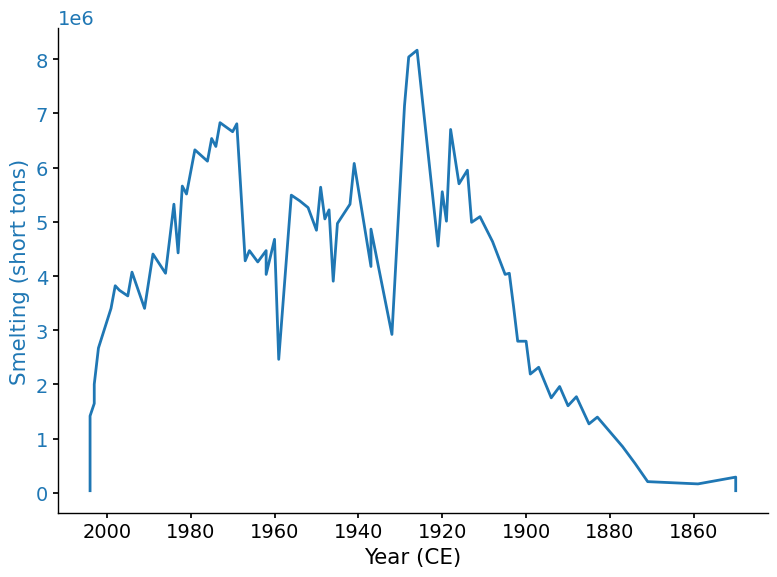

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


data_smelting = {
    "Year": [
        1850, 1850, 1859, 1871, 1874, 1877, 1883, 1885, 1888, 1890, 1892, 1894, 1897, 1899, 1900, 1902,
        1903, 1904, 1905, 1908, 1911, 1913, 1914, 1916, 1918, 1919, 1920, 1921, 1926, 1928, 1929, 1932,
        1937, 1937, 1941, 1942, 1945, 1946, 1947, 1948, 1949, 1950, 1952, 1954, 1956, 1959, 1960, 1962,
        1962, 1964, 1966, 1967, 1969, 1970, 1973, 1974, 1975, 1976, 1979, 1981, 1982, 1983, 1984, 1986,
        1989, 1991, 1994, 1995, 1997, 1998, 1999, 2002, 2003, 2003, 2004, 2004, 2004
    ],
    "Smelting (short tons)": [
        38806, 289552, 164179, 205970, 540299, 853731, 1397015, 1271642, 1773134, 1605970, 1961194,
        1752239, 2316418, 2191045, 2797015, 2797015, 3444776, 4050746, 4029851, 4635821, 5095522,
        4991045, 5952239, 5701493, 6704478, 5011940, 5555224, 4552239, 8167164, 8041791, 7143284,
        2922388, 4865672, 4176119, 6077612, 5325373, 4970149, 3904478, 5220896, 5053731, 5638806,
        4844776, 5262687, 5388060, 5492537, 2462687, 4677612, 4029851, 4468657, 4259701, 4468657,
        4280597, 6808955, 6662687, 6829851, 6391045, 6537313, 6119403, 6328358, 5513433, 5659701,
        4426866, 5325373, 4050746, 4405970, 3402985, 4071642, 3632836, 3737313, 3820896, 3402985,
        2671642, 2002985, 1647761, 1417910, 791045, 38806
    ]
}

# Convert the dictionaries to DataFrames
df_smelting = pd.DataFrame(data_smelting)

# Filter data for the year range 1500 to 2025
df_smelting = df_smelting[(df_smelting['Year'] >= 1700) & (df_smelting['Year'] <= 2025)]

# Plot the data
fig, ax1 = plt.subplots(figsize=(4, 6))

# Plotting smelting data on the top x-axis
color = 'tab:blue'
ax1.set_ylabel('Year (CE)')
ax1.set_xlabel('Smelting (short tons)', color=color)
ax1.plot(df_smelting['Smelting (short tons)'], df_smelting['Year'], color=color, label='Smelting')
ax1.tick_params(axis='x', labelcolor=color)
ax1.set_ylim(1700, 2023)  # Set the limit for the y-axis (flipped)
ax1.grid(False)  # Turn off the grid lines for the second x-axis

# Title and legend
plt.title('')
fig.tight_layout()

# Create a combined legend for both plots


# Show the plot
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data_smelting = {
"Year": [
    2004.666667, 2004, 2002.666667, 2002.333333, 2001.333333, 2000.666667, 2000.666667, 2000.666667,
    2000.333333, 2000, 1998.666667, 1998, 1998, 1997.333333, 1995.666667, 1993.333333, 1991.333333,
    1990, 1989, 1987.666667, 1987, 1985.333333, 1985, 1983.333333, 1981.666667, 1981, 1980.666667,
    1980.333333, 1979.333333, 1979, 1979, 1978.666667, 1977, 1975, 1974.666667, 1974, 1973.333333,
    1972.666667, 1972, 1971, 1971, 1971, 1970.666667, 1969.333333, 1968.333333, 1968.333333, 1967.666667,
    1967, 1966.666667, 1966.666667, 1966.333333, 1965.333333, 1964, 1961.666667, 1960.666667, 1960,
    1959.666667, 1959.666667, 1958.666667, 1957.666667, 1957.333333, 1956, 1954.666667, 1953.333333,
    1952.666667, 1952, 1950.333333, 1949, 1948.333333, 1948, 1948, 1947, 1945.333333, 1945.333333,
    1944, 1942.666667, 1941, 1939.333333, 1939.333333, 1939, 1937.333333, 1937.333333, 1935.666667,
    1935, 1934.333333, 1933.333333, 1931.666667, 1930.666667, 1930.666667, 1930.666667, 1930.333333,
    1930.333333, 1929.666667, 1929.666667, 1929.666667, 1928.333333, 1927.666667, 1926.333333, 1924.333333,
    1924, 1922.666667, 1922.333333, 1921.666667, 1920.666667, 1920, 1920, 1919.666667, 1918.333333,
    1918.333333, 1918.333333, 1918, 1915.666667, 1915.333333, 1915, 1915, 1914.666667, 1912.666667,
    1911.333333, 1908.666667, 1908.333333, 1907.333333, 1907, 1906, 1904.666667, 1903.333333,
    1901.333333, 1898.333333, 1895.666667, 1893, 1891.333333, 1888.333333, 1885, 1882.666667, 1879,
    1873.666667, 1867.666667, 1863.333333
],

 "Smelting (short tons)": [
    1312883.436, 1380368.098, 1392638.037, 1423312.883, 1619631.902, 1693251.534, 1558282.209, 1791411.043,
    1785276.074, 1877300.613, 2092024.54, 2343558.282, 2196319.018, 2312883.436, 2165644.172, 1987730.061,
    1840490.798, 1730061.35, 1680981.595, 1288343.558, 1490797.546, 1171779.141, 1220858.896, 1294478.528,
    1349693.252, 1466257.669, 1533742.331, 1595092.025, 1680981.595, 1601226.994, 1521472.393, 1668711.656,
    1552147.239, 1478527.607, 1527607.362, 1644171.779, 1723926.38, 1822085.89, 1889570.552, 1582822.086,
    1736196.319, 1846625.767, 1656441.718, 1754601.227, 1521472.393, 1656441.718, 1386503.067, 1177914.11,
    1539877.301, 1263803.681, 1404907.975, 1699386.503, 1638036.81, 1601226.994, 1564417.178, 1300613.497,
    1417177.914, 1527607.362, 1141104.294, 1257668.712, 1349693.252, 1411042.945, 1300613.497, 1208588.957,
    1276073.62, 1184049.08, 1208588.957, 957055.2147, 1269938.65, 1073619.632, 1190184.049, 1171779.141,
    1085889.571, 914110.4294, 1208588.957, 1331288.344, 1398773.006, 1073619.632, 1312883.436, 1177914.11,
    1049079.755, 975460.1227, 957055.2147, 815950.9202, 607361.9632, 423312.8834, 355828.2209, 656441.7178,
    539877.3006, 441717.7914, 883435.5828, 754601.227, 1257668.712, 1134969.325, 987730.0613, 1355828.221,
    1276073.62, 1159509.202, 1110429.448, 1116564.417, 993865.0307, 705521.4724, 840490.7975, 509202.454,
    797546.0123, 644171.7791, 742331.2883, 1134969.325, 1018404.908, 901840.4908, 1220858.896, 1159509.202,
    987730.0613, 871165.6442, 1079754.601, 766871.1656, 797546.0123, 723926.3804, 680981.5951, 638036.8098,
    576687.1166, 521472.3926, 539877.3006, 484662.5767, 398773.0061, 337423.3129, 269938.6503, 220858.8957,
    171779.1411, 147239.2638, 116564.4172, 85889.57055, 67484.66258, 24539.8773, 24539.8773, -9.31E-10,
    -9.31E-10
]
}

# Convert the dictionaries to DataFrames
df_smelting = pd.DataFrame(data_smelting)

# Filter data for the year range 1500 to 2025
df_smelting = df_smelting[(df_smelting['Year'] >= 1700) & (df_smelting['Year'] <= 2025)]

# Plot the data
fig, ax1 = plt.subplots(figsize=(4, 6))

# Plotting smelting data on the top x-axis
color = 'tab:brown'
ax1.set_ylabel('Year (CE)')
ax1.set_xlabel('Cu Smelting (short tons)', color=color)
ax1.plot(df_smelting['Smelting (short tons)'], df_smelting['Year'], color=color, label='Smelting')
ax1.tick_params(axis='x', labelcolor=color)
ax1.set_ylim(1700, 2023)  # Set the limit for the y-axis (flipped)
ax1.grid(False)  # Turn off the grid lines for the second x-axis

# Title and legend
plt.title('')
fig.tight_layout()

# Create a combined legend for both plots


# Show the plot
plt.show()



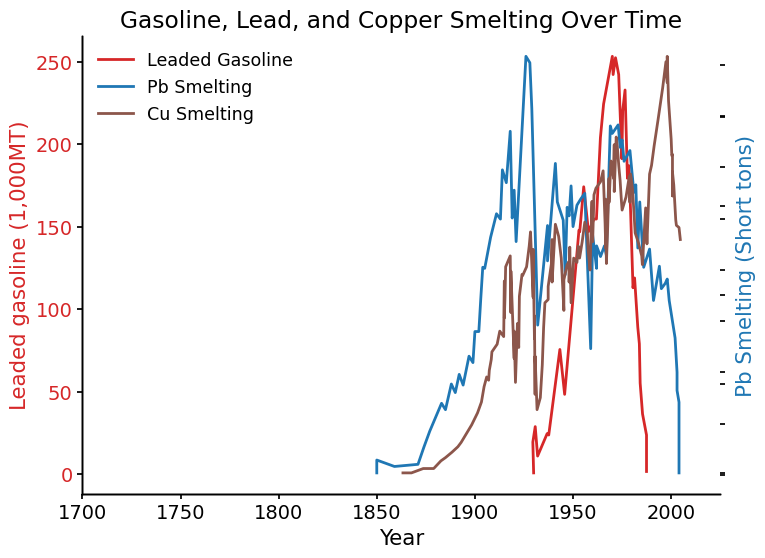

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# The data provided by the user in two separate tables
data_gasoline = {
    "Year": [
        1929.924, 1929.519, 1930.734, 1931.949, 1936.81, 1937.62, 1943.291, 1945.722, 1953.013,
        1953.418, 1955.443, 1957.873, 1960.709, 1961.924, 1963.949, 1965.57, 1970.025, 1970.43,
        1971.646, 1973.266, 1974.886, 1975.291, 1976.506, 1977.722, 1978.532, 1979.342, 1980.557,
        1981.367, 1982.987, 1983.797, 1984.203, 1985.418, 1987.443, 1987.443
    ],
    "Leaded gasoline (1,000MT)": [
        0.680272109, 19.3877551, 28.7414966, 10.88435374, 24.48979592, 23.63945578, 75.51020408,
        48.29931973, 147.7891156, 146.9387755, 174.1496599, 146.9387755, 154.5918367, 154.5918367,
        203.9115646, 224.3197279, 253.2312925, 242.1768707, 252.3809524, 242.1768707, 191.1564626,
        220.0680272, 232.8231293, 179.2517007, 186.9047619, 158.8435374, 112.9251701, 118.877551,
        89.11564626, 78.91156463, 55.10204082, 36.39455782, 23.63945578, 1.530612245
    ]
}
data_smelting = {
    "Year": [
        1850, 1850, 1859, 1871, 1874, 1877, 1883, 1885, 1888, 1890, 1892, 1894, 1897, 1899, 1900, 1902,
        1903, 1904, 1905, 1908, 1911, 1913, 1914, 1916, 1918, 1919, 1920, 1921, 1926, 1928, 1929, 1932,
        1937, 1937, 1941, 1942, 1945, 1946, 1947, 1948, 1949, 1950, 1952, 1954, 1956, 1959, 1960, 1962,
        1962, 1964, 1966, 1967, 1969, 1970, 1973, 1974, 1975, 1976, 1979, 1981, 1982, 1983, 1984, 1986,
        1989, 1991, 1994, 1995, 1997, 1998, 1999, 2002, 2003, 2003, 2004, 2004, 2004
    ],
    "Pb Smelting (short tons)": [
        38806, 289552, 164179, 205970, 540299, 853731, 1397015, 1271642, 1773134, 1605970, 1961194,
        1752239, 2316418, 2191045, 2797015, 2797015, 3444776, 4050746, 4029851, 4635821, 5095522,
        4991045, 5952239, 5701493, 6704478, 5011940, 5555224, 4552239, 8167164, 8041791, 7143284,
        2922388, 4865672, 4176119, 6077612, 5325373, 4970149, 3904478, 5220896, 5053731, 5638806,
        4844776, 5262687, 5388060, 5492537, 2462687, 4677612, 4029851, 4468657, 4259701, 4468657,
        4280597, 6808955, 6662687, 6829851, 6391045, 6537313, 6119403, 6328358, 5513433, 5659701,
        4426866, 5325373, 4050746, 4405970, 3402985, 4071642, 3632836, 3737313, 3820896, 3402985,
        2671642, 2002985, 1647761, 1417910, 791045, 38806
    ]
}

# New dataset for copper smelting
data_copper_smelting = {
    "Year": [
        2004.666667, 2004, 2002.666667, 2002.333333, 2001.333333, 2000.666667, 2000.666667, 2000.666667,
        2000.333333, 2000, 1998.666667, 1998, 1998, 1997.333333, 1995.666667, 1993.333333, 1991.333333,
        1990, 1989, 1987.666667, 1987, 1985.333333, 1985, 1983.333333, 1981.666667, 1981, 1980.666667,
        1980.333333, 1979.333333, 1979, 1979, 1978.666667, 1977, 1975, 1974.666667, 1974, 1973.333333,
        1972.666667, 1972, 1971, 1971, 1971, 1970.666667, 1969.333333, 1968.333333, 1968.333333, 1967.666667,
        1967, 1966.666667, 1966.666667, 1966.333333, 1965.333333, 1964, 1961.666667, 1960.666667, 1960,
        1959.666667, 1959.666667, 1958.666667, 1957.666667, 1957.333333, 1956, 1954.666667, 1953.333333,
        1952.666667, 1952, 1950.333333, 1949, 1948.333333, 1948, 1948, 1947, 1945.333333, 1945.333333,
        1944, 1942.666667, 1941, 1939.333333, 1939.333333, 1939, 1937.333333, 1937.333333, 1935.666667,
        1935, 1934.333333, 1933.333333, 1931.666667, 1930.666667, 1930.666667, 1930.666667, 1930.333333,
        1930.333333, 1929.666667, 1929.666667, 1929.666667, 1928.333333, 1927.666667, 1926.333333, 1924.333333,
        1924, 1922.666667, 1922.333333, 1921.666667, 1920.666667, 1920, 1920, 1919.666667, 1918.333333,
        1918.333333, 1918.333333, 1918, 1915.666667, 1915.333333, 1915, 1915, 1914.666667, 1912.666667,
        1911.333333, 1908.666667, 1908.333333, 1907.333333, 1907, 1906, 1904.666667, 1903.333333,
        1901.333333, 1898.333333, 1895.666667, 1893, 1891.333333, 1888.333333, 1885, 1882.666667, 1879,
        1873.666667, 1867.666667, 1863.333333
    ],
    "Cu Smelting (short tons)": [
        1312883.436, 1380368.098, 1392638.037, 1423312.883, 1619631.902, 1693251.534, 1558282.209, 1791411.043,
        1785276.074, 1877300.613, 2092024.54, 2343558.282, 2196319.018, 2312883.436, 2165644.172, 1987730.061,
        1840490.798, 1730061.35, 1680981.595, 1288343.558, 1490797.546, 1171779.141, 1220858.896, 1294478.528,
        1349693.252, 1466257.669, 1533742.331, 1595092.025, 1680981.595, 1601226.994, 1521472.393, 1668711.656,
        1552147.239, 1478527.607, 1527607.362, 1644171.779, 1723926.38, 1822085.89, 1889570.552, 1582822.086,
        1736196.319, 1846625.767, 1656441.718, 1754601.227, 1521472.393, 1656441.718, 1386503.067, 1177914.11,
        1539877.301, 1263803.681, 1404907.975, 1699386.503, 1638036.81, 1601226.994, 1564417.178, 1300613.497,
        1417177.914, 1527607.362, 1141104.294, 1257668.712, 1349693.252, 1411042.945, 1300613.497, 1208588.957,
        1276073.62, 1184049.08, 1208588.957, 957055.2147, 1269938.65, 1073619.632, 1190184.049, 1171779.141,
        1085889.571, 914110.4294, 1208588.957, 1331288.344, 1398773.006, 1073619.632, 1312883.436, 1177914.11,
        1049079.755, 975460.1227, 957055.2147, 815950.9202, 607361.9632, 423312.8834, 355828.2209, 656441.7178,
        539877.3006, 441717.7914, 883435.5828, 754601.227, 1257668.712, 1134969.325, 987730.0613, 1355828.221,
        1276073.62, 1159509.202, 1110429.448, 1116564.417, 993865.0307, 705521.4724, 840490.7975, 509202.454,
        797546.0123, 644171.7791, 742331.2883, 1134969.325, 1018404.908, 901840.4908, 1220858.896, 1159509.202,
        987730.0613, 871165.6442, 1079754.601, 766871.1656, 797546.0123, 723926.3804, 680981.5951, 638036.8098,
        576687.1166, 521472.3926, 539877.3006, 484662.5767, 398773.0061, 337423.3129, 269938.6503, 220858.8957,
        171779.1411, 147239.2638, 116564.4172, 85889.57055, 67484.66258, 24539.8773, 24539.8773, -9.31E-10,
        -9.31E-10
    ]
}

# Convert the dictionaries to DataFrames
df_gasoline = pd.DataFrame(data_gasoline)
df_smelting = pd.DataFrame(data_smelting)
df_copper_smelting = pd.DataFrame(data_copper_smelting)

# Filter data for the year range 1500 to 2025
df_gasoline = df_gasoline[(df_gasoline['Year'] >= 1700) & (df_gasoline['Year'] <= 2025)]
df_smelting = df_smelting[(df_smelting['Year'] >= 1700) & (df_smelting['Year'] <= 2025)]
df_copper_smelting = df_copper_smelting[(df_copper_smelting['Year'] >= 1700) & (df_copper_smelting['Year'] <= 2025)]

# Plot the data
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plotting gasoline data on the bottom x-axis
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Leaded gasoline (1,000MT)', color=color)
ax1.plot(df_gasoline['Year'], df_gasoline['Leaded gasoline (1,000MT)'], color=color, label='Leaded Gasoline')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim(1700, 2025)  # Set the limit for the x-axis
ax1.grid(False)  # Turn off the grid lines

# Instantiate a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plotting smelting data on the top x-axis
color = 'tab:blue'
ax2.set_ylabel('Pb Smelting (Short tons)', color=color)
ax2.plot(df_smelting['Year'], df_smelting['Pb Smelting (short tons)'], color=color, label='Pb Smelting')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xlim(1700, 2025)  # Set the limit for the x-axis
ax2.grid(False)  # Turn off the grid lines for the second y-axis

# Instantiate a third y-axis sharing the same x-axis
ax3 = ax1.twinx()

# Plotting copper smelting data on the right y-axis
color = 'tab:brown'
ax3.set_ylabel('', color=color)
ax3.plot(df_copper_smelting['Year'], df_copper_smelting['Cu Smelting (short tons)'], color=color, label='Cu Smelting')
ax3.tick_params(axis='y', labelcolor=color)
ax3.set_xlim(1700, 2025)  # Set the limit for the x-axis
ax3.grid(False)  # Turn off the grid lines for the third y-axis

# Title and legend
plt.title('Gasoline, Lead, and Copper Smelting Over Time')
fig.tight_layout()

# Create a combined legend for all plots
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper left')

ax2.set_yticklabels([])
ax3.set_yticklabels([])

# Show the plot
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# The data provided by the user in two separate tables
data_gasoline = {
    "Year": [
        1929.924, 1929.519, 1930.734, 1931.949, 1936.81, 1937.62, 1943.291, 1945.722, 1953.013,
        1953.418, 1955.443, 1957.873, 1960.709, 1961.924, 1963.949, 1965.57, 1970.025, 1970.43,
        1971.646, 1973.266, 1974.886, 1975.291, 1976.506, 1977.722, 1978.532, 1979.342, 1980.557,
        1981.367, 1982.987, 1983.797, 1984.203, 1985.418, 1987.443, 1987.443
    ],
    "Leaded gasoline (1,000MT)": [
        0.680272109, 19.3877551, 28.7414966, 10.88435374, 24.48979592, 23.63945578, 75.51020408,
        48.29931973, 147.7891156, 146.9387755, 174.1496599, 146.9387755, 154.5918367, 154.5918367,
        203.9115646, 224.3197279, 253.2312925, 242.1768707, 252.3809524, 242.1768707, 191.1564626,
        220.0680272, 232.8231293, 179.2517007, 186.9047619, 158.8435374, 112.9251701, 118.877551,
        89.11564626, 78.91156463, 55.10204082, 36.39455782, 23.63945578, 1.530612245
    ]
}
data_smelting = {
    "Year": [
        1850, 1850, 1859, 1871, 1874, 1877, 1883, 1885, 1888, 1890, 1892, 1894, 1897, 1899, 1900, 1902,
        1903, 1904, 1905, 1908, 1911, 1913, 1914, 1916, 1918, 1919, 1920, 1921, 1926, 1928, 1929, 1932,
        1937, 1937, 1941, 1942, 1945, 1946, 1947, 1948, 1949, 1950, 1952, 1954, 1956, 1959, 1960, 1962,
        1962, 1964, 1966, 1967, 1969, 1970, 1973, 1974, 1975, 1976, 1979, 1981, 1982, 1983, 1984, 1986,
        1989, 1991, 1994, 1995, 1997, 1998, 1999, 2002, 2003, 2003, 2004, 2004, 2004
    ],
    "Smelting (short tons)": [
        38806, 289552, 164179, 205970, 540299, 853731, 1397015, 1271642, 1773134, 1605970, 1961194,
        1752239, 2316418, 2191045, 2797015, 2797015, 3444776, 4050746, 4029851, 4635821, 5095522,
        4991045, 5952239, 5701493, 6704478, 5011940, 5555224, 4552239, 8167164, 8041791, 7143284,
        2922388, 4865672, 4176119, 6077612, 5325373, 4970149, 3904478, 5220896, 5053731, 5638806,
        4844776, 5262687, 5388060, 5492537, 2462687, 4677612, 4029851, 4468657, 4259701, 4468657,
        4280597, 6808955, 6662687, 6829851, 6391045, 6537313, 6119403, 6328358, 5513433, 5659701,
        4426866, 5325373, 4050746, 4405970, 3402985, 4071642, 3632836, 3737313, 3820896, 3402985,
        2671642, 2002985, 1647761, 1417910, 791045, 38806
    ]
}

# Convert the dictionaries to DataFrames
df_gasoline = pd.DataFrame(data_gasoline)
df_smelting = pd.DataFrame(data_smelting)

# Filter data for the year range 1500 to 2025
df_gasoline = df_gasoline[(df_gasoline['Year'] >= 1500) & (df_gasoline['Year'] <= 2025)]
df_smelting = df_smelting[(df_smelting['Year'] >= 1500) & (df_smelting['Year'] <= 2025)]

# Plot the data
fig, ax1 = plt.subplots(figsize=(4, 6))

# Plotting gasoline data on the bottom x-axis
color = 'tab:red'
ax1.set_ylabel('Year')
ax1.set_xlabel('Leaded gasoline (1,000MT)', color=color)
ax1.plot(df_gasoline['Leaded gasoline (1,000MT)'], df_gasoline['Year'], color=color, label='Leaded Gasoline')
ax1.tick_params(axis='x', labelcolor=color)
ax1.set_ylim(1700, 2023)  # Set the limit for the y-axis (flipped)
ax1.grid(False)  # Turn off the grid lines

# Instantiate a second x-axis sharing the same y-axis
ax2 = ax1.twiny()

# Plotting smelting data on the top x-axis
color = 'tab:blue'
ax2.set_xlabel('Pb Smelting (short tons)', color=color)
ax2.plot(df_smelting['Smelting (short tons)'], df_smelting['Year'], color=color, label='Pb Smelting')
ax2.tick_params(axis='x', labelcolor=color)
ax2.set_ylim(1700, 2023)  # Set the limit for the y-axis (flipped)
ax2.grid(False)  # Turn off the grid lines for the second x-axis

# Title and legend
plt.title('')
fig.tight_layout()

# Create a combined legend for both plots
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower left')

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Reading the data from the TXT file
data_dir = '/content/drive/MyDrive/Time Series'
# Open the dataset assuming it's a CSV file, change to pd.read_table for TSV files
data = pd.read_csv(data_dir+'/Challisupdated.txt', sep='\t')

non_nan_data5 = data[['CE','Pb Flux', 'Pb']].dropna()
dates_non_nan5 = non_nan_data5['CE'].tolist()
values_non_nan5_flux = non_nan_data5['Pb Flux'].tolist()
values_non_nan5_pb = non_nan_data5['Pb'].tolist()

# 2. Creating the plot
plt.figure(figsize=(6, 6))

# Creating axis for Pb Flux
ax1 = plt.gca()
ax1.plot(values_non_nan5_flux, dates_non_nan5, label='Pb Flux', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o', markersize=3)

# 3. Customizing the plot for Pb Flux
ax1.set_title('Pb and Pb Flux Over Years')
ax1.set_ylabel('Years (CE)')
ax1.set_xlabel('Pb Flux \n(mg cm$^{-3}$ y$^{-1}$)', color='black')
ax1.tick_params(axis='x', colors='black')
ax1.grid(False)

# Creating another x-axis for Pb
ax2 = ax1.twiny()
ax2.plot(values_non_nan5_pb, dates_non_nan5, label='Pb', linestyle='--', linewidth=1, alpha=0.7, color='red', marker='o', markersize=3)

# 4. Customizing the plot for Pb
ax2.set_xlabel('Pb', color='red')
ax2.tick_params(axis='x', colors='red')

# 5. Displaying the plot
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Reading the data from the TXT file
data_dir = '/content/drive/MyDrive/Time Series'
data = pd.read_csv(data_dir+'/Challisupdated.txt', sep='\t')

non_nan_data5 = data[['CE','Pb Flux', 'Pb']].dropna()
dates_non_nan5 = non_nan_data5['CE'].tolist()
values_non_nan5_flux = non_nan_data5['Pb Flux'].tolist()
values_non_nan5_pb = non_nan_data5['Pb'].tolist()

# 2. Creating the plot
plt.figure(figsize=(5, 6))

# Creating axis for Pb
ax1 = plt.gca()
ax1.plot(values_non_nan5_pb, dates_non_nan5, label='Pb mg/g', linestyle='--', linewidth=1, alpha=0.7, color='black', marker='o', markerfacecolor='none', markersize=5)

# 3. Customizing the plot for Pb
ax1.set_title('', fontsize=16)
ax1.set_ylabel('Years (CE)', fontsize=14)
ax1.set_xlabel('Pb (mg/g)', color='black', fontsize=14)
ax1.tick_params(axis='x', colors='black', labelsize=12)
ax1.grid(False)  # Ensuring gridlines are removed
ax1.set_ylim(1500, 2027)  # Setting the date range
ax1.set_xlim(-20, 350)  # Setting the Pb axis range from 0 to 250

# Creating another x-axis for Pb Flux
ax2 = ax1.twiny()
ax2.plot(values_non_nan5_flux, dates_non_nan5, label='Pb Flux', linestyle='-', linewidth=1, alpha=0.7, color='red', marker='^', markerfacecolor='none', markersize=5)
ax2.grid(False)  # Additionally ensuring gridlines are removed for this axis as well

# 4. Customizing the plot for Pb Flux and setting the x-axis limits
ax2.set_xlabel('Pb Flux \n(mg cm$^{-3}$ y$^{-1}$)', color='red', fontsize=14)
ax2.tick_params(axis='x', colors='red', labelsize=12)
ax2.set_xlim(-.1, 6.0)

# 5. Adding the legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='right', title='Challis Pond')

# 6. Displaying the plot
plt.tight_layout()
plt.show()






In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
# 1. Reading the data from the TXT file

data_dir = '/content/drive/MyDrive/Time Series'
data = pd.read_csv(data_dir+'/Challisupdated.txt', sep='\t')

# Assuming 'data' contains the data from the TXT file for Pb flux from Challis
# Extract relevant columns from data
dates_non_nan5 = data['CE']
values_non_nan5_flux = data['Pb Flux']
values_non_nan5_pb = data['Pb']

# Combine Pb flux and Pb into a DataFrame
df = pd.DataFrame({'Pb Flux': values_non_nan5_flux, 'Pb': values_non_nan5_pb})

# Assuming data_smelting and data_gasoline contain the provided datasets
# Convert datasets to pandas DataFrame
df_smelting = pd.DataFrame(data_smelting)
df_gasoline = pd.DataFrame(data_gasoline)

# Assuming 'CE' corresponds to the same time frame in both datasets
# Selecting common timeframe for smelting and gasoline data
common_timeframe = df_smelting['CE'].isin(dates_non_nan5)

# Filtered data for smelting and gasoline
filtered_smelting = df_smelting[common_timeframe]
filtered_gasoline = df_gasoline[common_timeframe]

# Combine filtered_smelting and filtered_gasoline into a DataFrame
df_combined = pd.concat([filtered_smelting.reset_index(drop=True), filtered_gasoline.reset_index(drop=True)], axis=1)

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df_combined)

# Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_imputed)

# Perform PCA
pca = PCA()
pca.fit(df_standardized)

# Transform the data to principal components
pc_scores = pca.transform(df_standardized)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Loadings of each principal component
loadings = pca.components_

# Print explained variance ratio and loadings
print("Explained Variance Ratio:", explained_variance_ratio)
print("Loadings:\n", loadings)




Explained Variance Ratio: [0.55804236 0.20759221 0.16815347 0.06621197]
Loadings:
 [[-0.37765472 -0.54064522 -0.60523037 -0.44584286]
 [-0.8672824   0.17347232  0.04401181  0.46453369]
 [-0.26757146  0.59238123  0.18140933 -0.73795707]
 [-0.18331301 -0.57157202  0.77385387 -0.20211867]]


<ipython-input-7-ea30718da061>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_gasoline = df_gasoline[common_timeframe]


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Assuming pc_scores contains the transformed data points
# Extracting the first two principal components
pc1 = pc_scores[:, 0]
pc2 = pc_scores[:, 1]

# Creating a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2, alpha=0.5)
plt.title('PCA Scatter Plot (First 2 Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()




In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Specify the path to your dataset
data_dir = '/content/drive/MyDrive/Time Series'
file_path = f'{data_dir}/Challisupdated.txt'

# Columns you want to analyze (excluding 'Mn.1')
columns_to_use = ['As', 'Mn', 'Zn', 'Pb', 'Cd', 'Ni', 'Co', 'Cr', 'Fe', 'Mg', 'V', 'Ca', 'Cu', 'Ag', 'Al', 'Sr', 'Ba', 'Na', 'K', 'Rb']

# Load the dataset
data = pd.read_csv(file_path, sep='\t', usecols=columns_to_use)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform PCA
pca = PCA(n_components=2)  # Adjust n_components as needed
principalComponents = pca.fit_transform(data_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Function to create a biplot
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    plt.figure(figsize=(12,8))
    plt.scatter(xs * scalex, ys * scaley, c='gray')  # Plotting the scaled points

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title('PCA Biplot')
    plt.axhline(y=0, color='k', linestyle='--')
    plt.axvline(x=0, color='k', linestyle='--')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.grid(True)

# The loading scores for PCA
loadings = pca.components_.T

# Creating a biplot
biplot(principalComponents, loadings, labels=columns_to_use)
plt.show()

# Explained variance
print("Explained variance by component: ", pca.explained_variance_ratio_)





ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

<ipython-input-20-116826bc7ec6>:20: RuntimeWarning: invalid value encountered in log
  geometric_mean = np.exp(np.mean(np.log(data_with_offset), axis=1)).reshape(-1, 1)


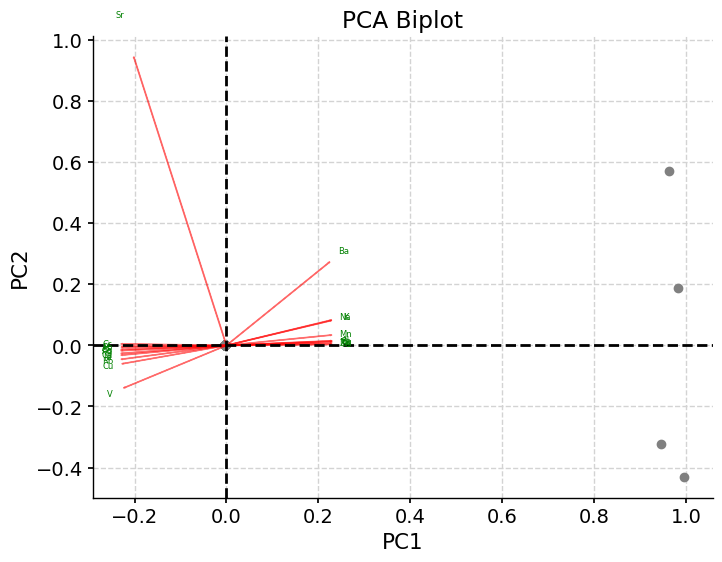

Explained variance by component:  [0.98261852 0.01161644]


In [20]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Placeholder for loading data; please ensure this matches your environment and data format
data_dir = '/content/drive/MyDrive/Time Series'
file_path = f'{data_dir}/Challisupdated.txt'
columns_to_use = ['As', 'Mn', 'Zn', 'Pb', 'Cd', 'Ni', 'Co', 'Cr', 'Fe', 'Mg', 'V', 'Ca', 'Cu', 'Ag', 'Al', 'Sr', 'Ba', 'Na', 'K', 'Rb']

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

# CLR Transformation Function with zero handling
def clr_transformation(data):
    data_with_offset = data + 1e-5  # Avoid log(0) issue by adding a small value
    geometric_mean = np.exp(np.mean(np.log(data_with_offset), axis=1)).reshape(-1, 1)
    clr_data = np.log(data_with_offset / geometric_mean)
    return clr_data

# Apply CLR transformation
data_clr = clr_transformation(data_imputed)

# Replace any potential -inf, inf, or NaN values resulted from transformation
data_clr = np.nan_to_num(data_clr, nan=0.0, posinf=0.0, neginf=0.0)

# Standardize the CLR-transformed data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clr)

# Perform PCA
pca = PCA(n_components=2)  # Adjust n_components as needed
principalComponents = pca.fit_transform(data_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Adjusted biplot function to display PCA results and component loadings
def biplot_adjusted(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize=(8, 6))
    plt.scatter(xs * scalex, ys * scaley, c='gray')
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center', fontsize=6)
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center', fontsize=6)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title('PCA Biplot')
    plt.axhline(y=0, color='k', linestyle='--')
    plt.axvline(x=0, color='k', linestyle='--')
    plt.grid(True)

    plt.show()

# The loading scores for PCA
loadings = pca.components_.T

# Creating a biplot
biplot_adjusted(principalComponents, loadings, labels=columns_to_use)

# Print explained variance
print("Explained variance by component: ", pca.explained_variance_ratio_)



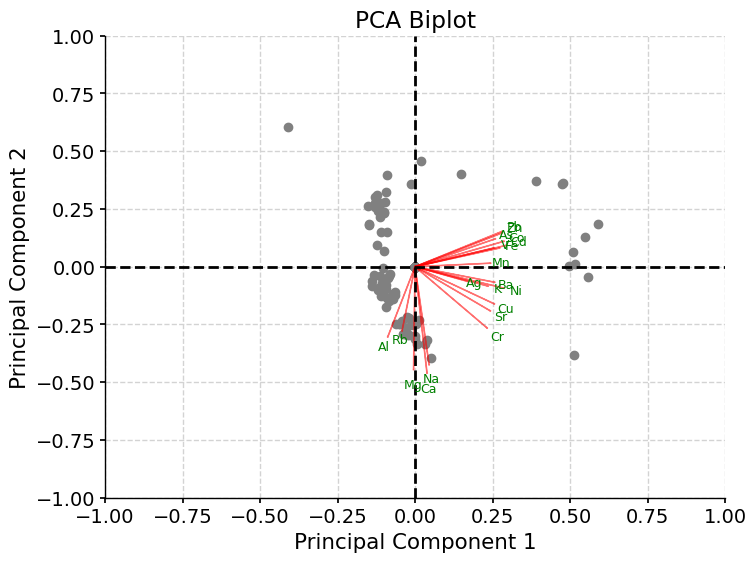

Explained variance by component:  [0.55618915 0.22347792]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Specify the path to your dataset
data_dir = '/content/drive/MyDrive/Time Series'
file_path = f'{data_dir}/Challisupdated.txt'

# Columns you want to analyze (excluding 'Mn.1')
columns_to_use = ['As', 'Mn', 'Zn', 'Pb', 'Cd', 'Ni', 'Co', 'Cr', 'Fe', 'Mg', 'V', 'Ca', 'Cu', 'Ag', 'Al', 'Sr', 'Ba', 'Na', 'K', 'Rb']

# Load the dataset
data = pd.read_csv(file_path, sep='\t', usecols=columns_to_use)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

# Standardize the imputed data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Perform PCA
pca = PCA(n_components=2)  # Adjust n_components as needed
principalComponents = pca.fit_transform(data_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Adjusted biplot function
def biplot_adjusted(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    plt.figure(figsize=(8, 6))  # Adjusted to make the plot smaller
    plt.scatter(xs * scalex, ys * scaley, c='gray')  # Plotting the scaled points

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center', fontsize=9)
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center', fontsize=9)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title('PCA Biplot')
    plt.axhline(y=0, color='k', linestyle='--')
    plt.axvline(x=0, color='k', linestyle='--')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.grid(True)

# The loading scores for PCA
loadings = pca.components_.T

# Creating a biplot with adjusted text size and smaller plot
biplot_adjusted(principalComponents, loadings, labels=columns_to_use)
plt.show()

# Print explained variance
print("Explained variance by component: ", pca.explained_variance_ratio_)




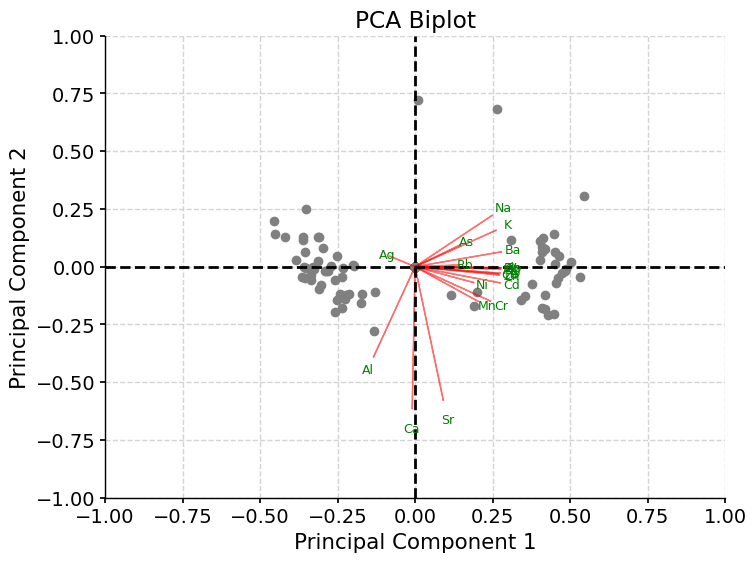

Explained variance by component:  [0.63386619 0.11947924]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Specify the path to your dataset
data_dir = '/content/drive/MyDrive/Time Series'
file_path = f'{data_dir}/heartupdated.txt'

# Columns you want to analyze (excluding 'Mn.1')
columns_to_use = ['As', 'Mn', 'Zn', 'Pb', 'Cd', 'Ni', 'Co', 'Cr', 'Fe', 'Mg', 'V', 'Ca', 'Cu', 'Ag', 'Al', 'Sr', 'Ba', 'Na', 'K', 'Rb']

# Load the dataset
data = pd.read_csv(file_path, sep='\t', usecols=columns_to_use)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

# Standardize the imputed data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Perform PCA
pca = PCA(n_components=2)  # Adjust n_components as needed
principalComponents = pca.fit_transform(data_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Adjusted biplot function
def biplot_adjusted(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    plt.figure(figsize=(8, 6))  # Adjusted to make the plot smaller
    plt.scatter(xs * scalex, ys * scaley, c='gray')  # Plotting the scaled points

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center', fontsize=9)
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center', fontsize=9)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title('PCA Biplot')
    plt.axhline(y=0, color='k', linestyle='--')
    plt.axvline(x=0, color='k', linestyle='--')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.grid(True)

# The loading scores for PCA
loadings = pca.components_.T

# Creating a biplot with adjusted text size and smaller plot
biplot_adjusted(principalComponents, loadings, labels=columns_to_use)
plt.show()

# Print explained variance
print("Explained variance by component: ", pca.explained_variance_ratio_)

In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Specify the path to your dataset
data_dir = '/content/drive/MyDrive/Time Series'
file_path = f'{data_dir}/heartupdated.txt'

# Load the dataset
data = pd.read_csv(file_path, sep='\t')  # Adjust the separator if needed
print("Original data shape:", data.shape)  # Check the initial number of samples

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)
print("Imputed data shape:", data_imputed.shape)  # Confirm the number of samples after imputation

# Standardize the data after imputation
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)
print("Scaled data shape:", data_scaled.shape)  # Confirm the number of samples after scaling

# Perform PCA
pca = PCA(n_components=2)  # Adjust n_components as needed
principalComponents = pca.fit_transform(data_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Adjusted biplot function to display PCA results and component loadings
def biplot_adjusted(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize=(8, 6))
    plt.scatter(xs * scalex, ys * scaley, c='gray')
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center', fontsize=6)
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center', fontsize=6)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title('PCA Biplot')
    plt.axhline(y=0, color='k', linestyle='--')
    plt.axvline(x=0, color='k', linestyle='--')
    plt.grid(True)

    plt.show()

# Confirm the number of samples matches the number of principal components
if data.shape[0] == principalComponents.shape[0]:
    print("The number of samples matches the number of principal components.")
else:
    print("Mismatch in the number of samples and the number of principal components.")


Original data shape: (421, 70)
Imputed data shape: (421, 70)
Scaled data shape: (421, 70)
The number of samples matches the number of principal components.


<ipython-input-3-f15f32b61b5c>:24: RuntimeWarning: invalid value encountered in log
  geometric_mean = np.exp(np.mean(np.log(data_with_offset), axis=1)).reshape(-1, 1)


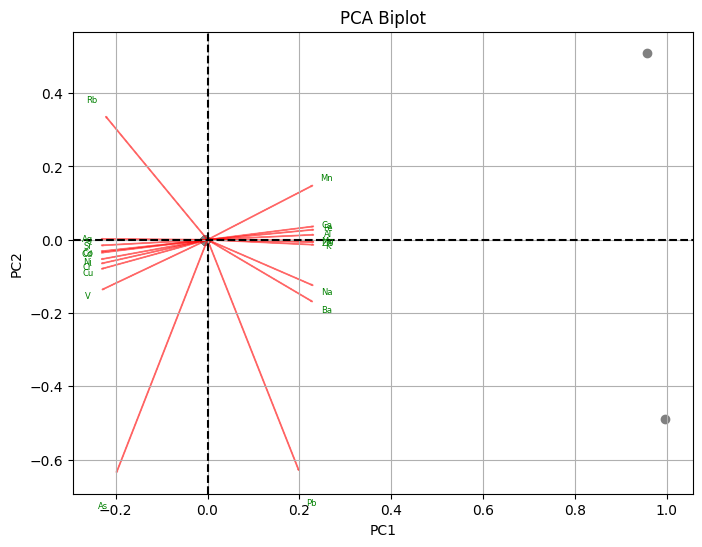

Explained variance by component:  [0.96884758 0.03115242]


In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Specify the path to your dataset
data_dir = '/content/drive/MyDrive/Time Series'
file_path = f'{data_dir}/heartupdated.txt'

# Columns you want to analyze (excluding 'Mn.1')
columns_to_use = ['As', 'Mn', 'Zn', 'Pb', 'Cd', 'Ni', 'Co', 'Cr', 'Fe', 'Mg', 'V', 'Ca', 'Cu', 'Ag', 'Al', 'Sr', 'Ba', 'Na', 'K', 'Rb']

data = pd.read_csv(file_path, sep='\t', usecols=columns_to_use)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

# CLR Transformation Function with zero handling
def clr_transformation(data):
    data_with_offset = data + 1e-5  # Avoid log(0) issue by adding a small value
    geometric_mean = np.exp(np.mean(np.log(data_with_offset), axis=1)).reshape(-1, 1)
    clr_data = np.log(data_with_offset / geometric_mean)
    return clr_data

# Apply CLR transformation
data_clr = clr_transformation(data_imputed)

# Replace any potential -inf, inf, or NaN values resulted from transformation
data_clr = np.nan_to_num(data_clr, nan=0.0, posinf=0.0, neginf=0.0)

# Standardize the CLR-transformed data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clr)

# Perform PCA
pca = PCA(n_components=2)  # Adjust n_components as needed
principalComponents = pca.fit_transform(data_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Adjusted biplot function to display PCA results and component loadings
def biplot_adjusted(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize=(8, 6))
    plt.scatter(xs * scalex, ys * scaley, c='gray')
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center', fontsize=6)
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center', fontsize=6)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title('PCA Biplot')
    plt.axhline(y=0, color='k', linestyle='--')
    plt.axvline(x=0, color='k', linestyle='--')
    plt.grid(True)

    plt.show()

# The loading scores for PCA
loadings = pca.components_.T

# Creating a biplot
biplot_adjusted(principalComponents, loadings, labels=columns_to_use)

# Print explained variance
print("Explained variance by component: ", pca.explained_variance_ratio_)

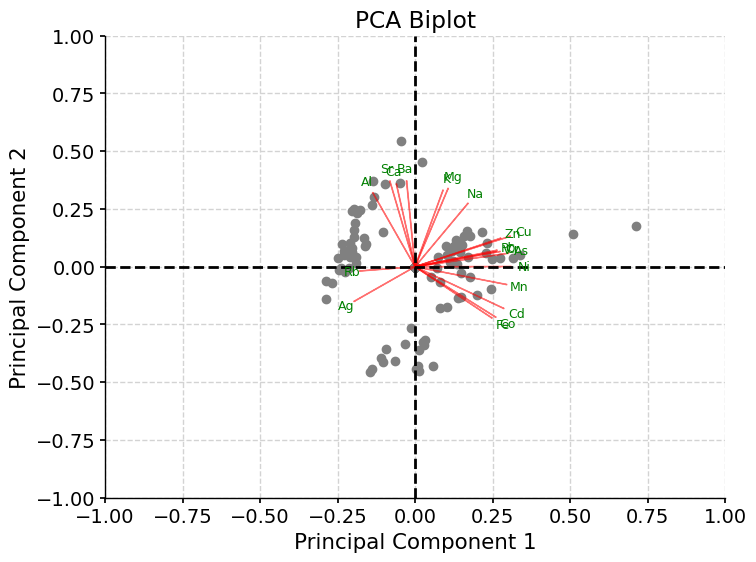

Explained variance by component:  [0.46105018 0.3151295 ]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Specify the path to your dataset
data_dir = '/content/drive/MyDrive/Time Series'
file_path = f'{data_dir}/Black.txt'

# Columns you want to analyze (excluding 'Mn.1')
columns_to_use = ['As', 'Mn', 'Zn', 'Pb', 'Cd', 'Ni', 'Co', 'Cr', 'Fe', 'Mg', 'V', 'Ca', 'Cu', 'Ag', 'Al', 'Sr', 'Ba', 'Na', 'K', 'Rb']

# Load the dataset
data = pd.read_csv(file_path, sep='\t', usecols=columns_to_use)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

# Standardize the imputed data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Perform PCA
pca = PCA(n_components=2)  # Adjust n_components as needed
principalComponents = pca.fit_transform(data_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Adjusted biplot function
def biplot_adjusted(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    plt.figure(figsize=(8, 6))  # Adjusted to make the plot smaller
    plt.scatter(xs * scalex, ys * scaley, c='gray')  # Plotting the scaled points

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center', fontsize=9)
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center', fontsize=9)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title('PCA Biplot')
    plt.axhline(y=0, color='k', linestyle='--')
    plt.axvline(x=0, color='k', linestyle='--')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.grid(True)

# The loading scores for PCA
loadings = pca.components_.T

# Creating a biplot with adjusted text size and smaller plot
biplot_adjusted(principalComponents, loadings, labels=columns_to_use)
plt.show()

# Print explained variance
print("Explained variance by component: ", pca.explained_variance_ratio_)

<ipython-input-9-66b55ae2e108>:24: RuntimeWarning: invalid value encountered in log
  geometric_mean = np.exp(np.mean(np.log(data_with_offset), axis=1)).reshape(-1, 1)


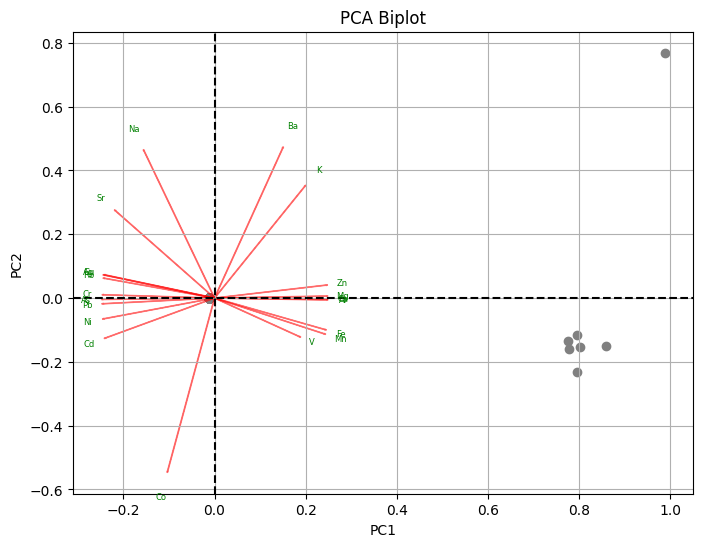

Explained variance by component:  [0.83414237 0.1354076 ]


In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Specify the path to your dataset
data_dir = '/content/drive/MyDrive/Time Series'
file_path = f'{data_dir}/Black.txt'

# Columns you want to analyze (excluding 'Mn.1')
columns_to_use = ['As', 'Mn', 'Zn', 'Pb', 'Cd', 'Ni', 'Co', 'Cr', 'Fe', 'Mg', 'V', 'Ca', 'Cu', 'Ag', 'Al', 'Sr', 'Ba', 'Na', 'K', 'Rb']

data = pd.read_csv(file_path, sep='\t', usecols=columns_to_use)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

# CLR Transformation Function with zero handling
def clr_transformation(data):
    data_with_offset = data + 1e-5  # Avoid log(0) issue by adding a small value
    geometric_mean = np.exp(np.mean(np.log(data_with_offset), axis=1)).reshape(-1, 1)
    clr_data = np.log(data_with_offset / geometric_mean)
    return clr_data

# Apply CLR transformation
data_clr = clr_transformation(data_imputed)

# Replace any potential -inf, inf, or NaN values resulted from transformation
data_clr = np.nan_to_num(data_clr, nan=0.0, posinf=0.0, neginf=0.0)

# Standardize the CLR-transformed data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clr)

# Perform PCA
pca = PCA(n_components=2)  # Adjust n_components as needed
principalComponents = pca.fit_transform(data_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Adjusted biplot function to display PCA results and component loadings
def biplot_adjusted(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize=(8, 6))
    plt.scatter(xs * scalex, ys * scaley, c='gray')
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center', fontsize=6)
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center', fontsize=6)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title('PCA Biplot')
    plt.axhline(y=0, color='k', linestyle='--')
    plt.axvline(x=0, color='k', linestyle='--')
    plt.grid(True)

    plt.show()

# The loading scores for PCA
loadings = pca.components_.T

# Creating a biplot
biplot_adjusted(principalComponents, loadings, labels=columns_to_use)

# Print explained variance
print("Explained variance by component: ", pca.explained_variance_ratio_)

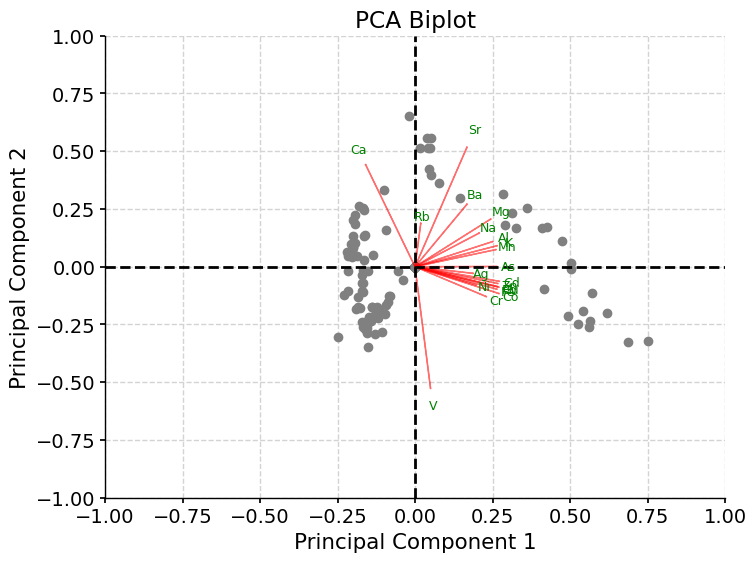

Explained variance by component:  [0.65894882 0.10688483]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Specify the path to your dataset
data_dir = '/content/drive/MyDrive/Time Series'
file_path = f'{data_dir}/Ratupdated.txt'

# Columns you want to analyze (excluding 'Mn.1')
columns_to_use = ['As', 'Mn', 'Zn', 'Pb', 'Cd', 'Ni', 'Co', 'Cr', 'Fe', 'Mg', 'V', 'Ca', 'Cu', 'Ag', 'Al', 'Sr', 'Ba', 'Na', 'K', 'Rb']

# Load the dataset
data = pd.read_csv(file_path, sep='\t', usecols=columns_to_use)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

# Standardize the imputed data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Perform PCA
pca = PCA(n_components=2)  # Adjust n_components as needed
principalComponents = pca.fit_transform(data_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Adjusted biplot function
def biplot_adjusted(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    plt.figure(figsize=(8, 6))  # Adjusted to make the plot smaller
    plt.scatter(xs * scalex, ys * scaley, c='gray')  # Plotting the scaled points

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center', fontsize=9)
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center', fontsize=9)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title('PCA Biplot')
    plt.axhline(y=0, color='k', linestyle='--')
    plt.axvline(x=0, color='k', linestyle='--')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.grid(True)

# The loading scores for PCA
loadings = pca.components_.T

# Creating a biplot with adjusted text size and smaller plot
biplot_adjusted(principalComponents, loadings, labels=columns_to_use)
plt.show()

# Print explained variance
print("Explained variance by component: ", pca.explained_variance_ratio_)

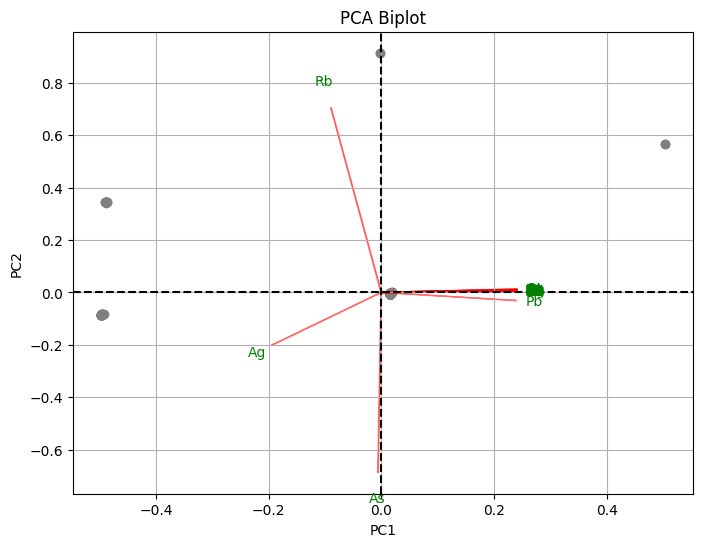

Explained variance by component: [0.88885401 0.06852455]


In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Specify the path to your dataset
data_dir = '/content/drive/MyDrive/Time Series'
file_path = f'{data_dir}/Ratupdated.txt'

# Columns to analyze
columns_to_use = ['As', 'Mn', 'Zn', 'Pb', 'Cd', 'Ni', 'Co', 'Cr', 'Fe', 'Mg', 'V', 'Ca', 'Cu', 'Ag', 'Al', 'Sr', 'Ba', 'Na', 'K', 'Rb']

# Load the dataset
data = pd.read_csv(file_path, sep='\t', usecols=columns_to_use)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

# Check for any remaining NaNs or Infs in the dataset
assert not np.isnan(data_imputed).any(), "NaNs present in imputed data"
assert not np.isinf(data_imputed).any(), "Infs present in imputed data"

# CLR Transformation Function with zero handling
def clr_transformation(data):
    # Make sure there are no zero values in the data
    data[data <= 0] = np.nextafter(0, 1)  # Replace 0 and negative values with the smallest positive float
    geometric_mean = np.exp(np.mean(np.log(data), axis=1)).reshape(-1, 1)
    clr_data = np.log(data / geometric_mean)
    return clr_data

# Apply CLR transformation
data_clr = clr_transformation(data_imputed)

# Standardize the CLR-transformed data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clr)

# Check for any remaining NaNs or Infs after scaling
assert not np.isnan(data_scaled).any(), "NaNs present in scaled data"
assert not np.isinf(data_scaled).any(), "Infs present in scaled data"

# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)

# Check the variance to make sure PCA was successful
assert not np.isnan(pca.explained_variance_ratio_).any(), "NaNs present in PCA explained variance ratio"

# Adjusted biplot function to display PCA results and component loadings
def biplot_adjusted(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    # Check if the range is zero and adjust the scale to avoid divide by zero
    scalex = 1.0 / (xs.max() - xs.min()) if not np.isclose(xs.max(), xs.min()) else 1.0
    scaley = 1.0 / (ys.max() - ys.min()) if not np.isclose(ys.max(), ys.min()) else 1.0

    plt.figure(figsize=(8, 6))
    plt.scatter(xs * scalex, ys * scaley, c='gray')  # Check if multiplying by scale results in NaNs or Infs

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title('PCA Biplot')
    plt.axhline(y=0, color='k', linestyle='--')
    plt.axvline(x=0, color='k', linestyle='--')
    plt.grid(True)
    plt.show()

# Creating a biplot
biplot_adjusted(principalComponents, pca.components_.T, labels=columns_to_use)

# Print explained variance
print("Explained variance by component:", pca.explained_variance_ratio_)




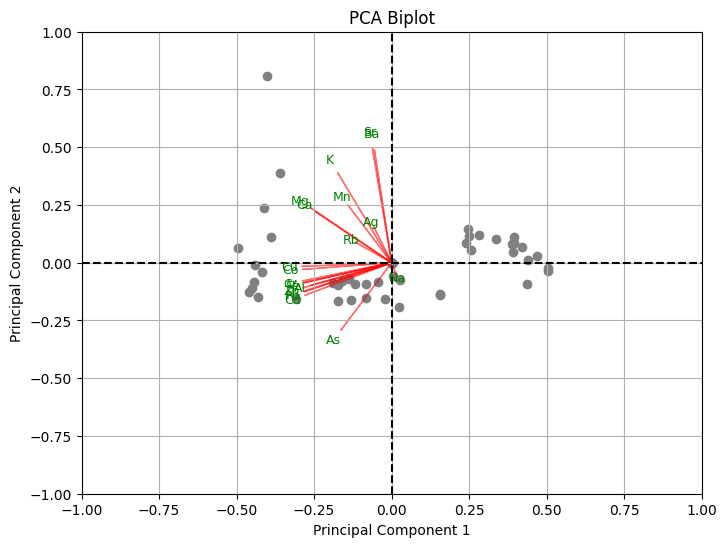

Explained variance by component:  [0.59145372 0.18083015]


In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Specify the path to your dataset
data_dir = '/content/drive/MyDrive/Time Series'
file_path = f'{data_dir}/Payneupdated.txt'

# Columns you want to analyze (excluding 'Mn.1')
columns_to_use = ['As', 'Mn', 'Zn', 'Pb', 'Cd', 'Ni', 'Co', 'Cr', 'Fe', 'Mg', 'V', 'Ca', 'Cu', 'Ag', 'Al', 'Sr', 'Ba', 'Na', 'K', 'Rb']

# Load the dataset
data = pd.read_csv(file_path, sep='\t', usecols=columns_to_use)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

# Standardize the imputed data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Perform PCA
pca = PCA(n_components=2)  # Adjust n_components as needed
principalComponents = pca.fit_transform(data_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Adjusted biplot function
def biplot_adjusted(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    plt.figure(figsize=(8, 6))  # Adjusted to make the plot smaller
    plt.scatter(xs * scalex, ys * scaley, c='gray')  # Plotting the scaled points

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center', fontsize=9)
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center', fontsize=9)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title('PCA Biplot')
    plt.axhline(y=0, color='k', linestyle='--')
    plt.axvline(x=0, color='k', linestyle='--')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.grid(True)

# The loading scores for PCA
loadings = pca.components_.T

# Creating a biplot with adjusted text size and smaller plot
biplot_adjusted(principalComponents, loadings, labels=columns_to_use)
plt.show()

# Print explained variance
print("Explained variance by component: ", pca.explained_variance_ratio_)

In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Specify the path to your dataset
data_dir = '/content/drive/MyDrive/Time Series'
file_path = f'{data_dir}/Payneupdated.txt'

# Columns to analyze
columns_to_use = ['As', 'Mn', 'Zn', 'Pb', 'Cd', 'Ni', 'Co', 'Cr', 'Fe', 'Mg', 'V', 'Ca', 'Cu', 'Ag', 'Al', 'Sr', 'Ba', 'Na', 'K', 'Rb']

# Load the dataset
data = pd.read_csv(file_path, sep='\t', usecols=columns_to_use)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

# Check for any remaining NaNs or Infs in the dataset
assert not np.isnan(data_imputed).any(), "NaNs present in imputed data"
assert not np.isinf(data_imputed).any(), "Infs present in imputed data"

# CLR Transformation Function with zero handling
def clr_transformation(data):
    # Make sure there are no zero values in the data
    data[data <= 0] = np.nextafter(0, 1)  # Replace 0 and negative values with the smallest positive float
    geometric_mean = np.exp(np.mean(np.log(data), axis=1)).reshape(-1, 1)
    clr_data = np.log(data / geometric_mean)
    return clr_data

# Apply CLR transformation
data_clr = clr_transformation(data_imputed)

# Standardize the CLR-transformed data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clr)

# Check for any remaining NaNs or Infs after scaling
assert not np.isnan(data_scaled).any(), "NaNs present in scaled data"
assert not np.isinf(data_scaled).any(), "Infs present in scaled data"

# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)

# Check the variance to make sure PCA was successful
assert not np.isnan(pca.explained_variance_ratio_).any(), "NaNs present in PCA explained variance ratio"

# Adjusted biplot function to display PCA results and component loadings
def biplot_adjusted(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    # Check if the range is zero and adjust the scale to avoid divide by zero
    scalex = 1.0 / (xs.max() - xs.min()) if not np.isclose(xs.max(), xs.min()) else 1.0
    scaley = 1.0 / (ys.max() - ys.min()) if not np.isclose(ys.max(), ys.min()) else 1.0

    plt.figure(figsize=(8, 6))
    plt.scatter(xs * scalex, ys * scaley, c='gray')  # Check if multiplying by scale results in NaNs or Infs

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title('PCA Biplot')
    plt.axhline(y=0, color='k', linestyle='--')
    plt.axvline(x=0, color='k', linestyle='--')
    plt.grid(True)
    plt.show()

# Creating a biplot
biplot_adjusted(principalComponents, pca.components_.T, labels=columns_to_use)

# Print explained variance
print("Explained variance by component:", pca.explained_variance_ratio_)

Explained variance by component: [0.91345723 0.05724101]


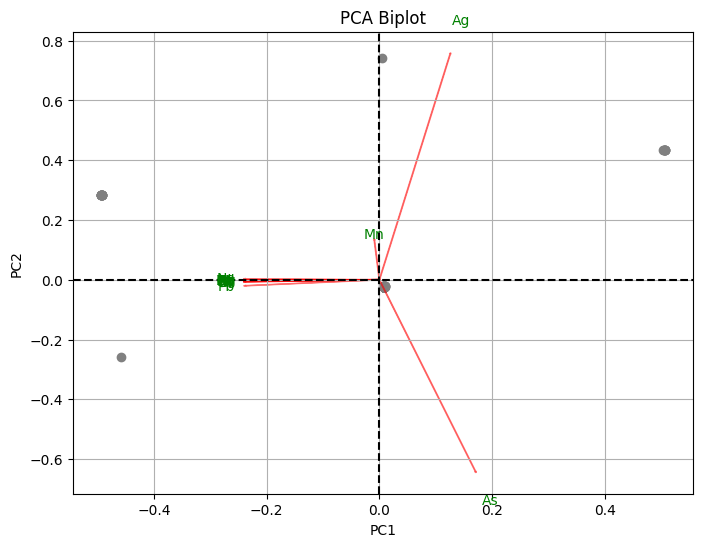

Explained variance by component: [0.88914025 0.05814054]


In [15]:


import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


# Specify the path to your dataset
data_dir = '/content/drive/MyDrive/Time Series'
file_path = f'{data_dir}/updatedlittlehope.txt'

# Columns you want to analyze (excluding 'Mn.1')
columns_to_use = ['As', 'Mn', 'Zn', 'Pb', 'Cd', 'Ni', 'Co', 'Cr', 'Fe', 'Mg', 'V', 'Ca', 'Cu', 'Ag', 'Al', 'Sr', 'Ba', 'Na', 'K', 'Rb']

# Load the dataset with ISO-8859-1 encoding
data = pd.read_csv(file_path, sep='\t', usecols=columns_to_use, encoding='ISO-8859-1')
# Specify the path to your dataset
data_dir = '/content/drive/MyDrive/Time Series'
file_path = f'{data_dir}/updatedlittlehope.txt'

# Columns you want to analyze (excluding 'Mn.1')
columns_to_use = ['As', 'Mn', 'Zn', 'Pb', 'Cd', 'Ni', 'Co', 'Cr', 'Fe', 'Mg', 'V', 'Ca', 'Cu', 'Ag', 'Al', 'Sr', 'Ba', 'Na', 'K', 'Rb']

# Load the dataset with ISO-8859-1 encoding
data = pd.read_csv(file_path, sep='\t', usecols=columns_to_use, encoding='ISO-8859-1')

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

# Check for any remaining NaNs or Infs in the dataset
assert not np.isnan(data_imputed).any(), "NaNs present in imputed data"
assert not np.isinf(data_imputed).any(), "Infs present in imputed data"

# CLR Transformation Function with zero handling
def clr_transformation(data):
    # Make sure there are no zero values in the data
    data[data <= 0] = np.nextafter(0, 1)  # Replace 0 and negative values with the smallest positive float
    geometric_mean = np.exp(np.mean(np.log(data), axis=1)).reshape(-1, 1)
    clr_data = np.log(data / geometric_mean)
    return clr_data

# Apply CLR transformation
data_clr = clr_transformation(data_imputed)

# Standardize the CLR-transformed data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clr)

# Check for any remaining NaNs or Infs after scaling
assert not np.isnan(data_scaled).any(), "NaNs present in scaled data"
assert not np.isinf(data_scaled).any(), "Infs present in scaled data"

# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)

# Check the variance to make sure PCA was successful
assert not np.isnan(pca.explained_variance_ratio_).any(), "NaNs present in PCA explained variance ratio"

# Adjusted biplot function to display PCA results and component loadings
def biplot_adjusted(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    # Check if the range is zero and adjust the scale to avoid divide by zero
    scalex = 1.0 / (xs.max() - xs.min()) if not np.isclose(xs.max(), xs.min()) else 1.0
    scaley = 1.0 / (ys.max() - ys.min()) if not np.isclose(ys.max(), ys.min()) else 1.0

    plt.figure(figsize=(8, 6))
    plt.scatter(xs * scalex, ys * scaley, c='gray')  # Check if multiplying by scale results in NaNs or Infs

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title('PCA Biplot')
    plt.axhline(y=0, color='k', linestyle='--')
    plt.axvline(x=0, color='k', linestyle='--')
    plt.grid(True)
    plt.show()

# Creating a biplot
biplot_adjusted(principalComponents, pca.components_.T, labels=columns_to_use)

# Print explained variance
print("Explained variance by component:", pca.explained_variance_ratio_)

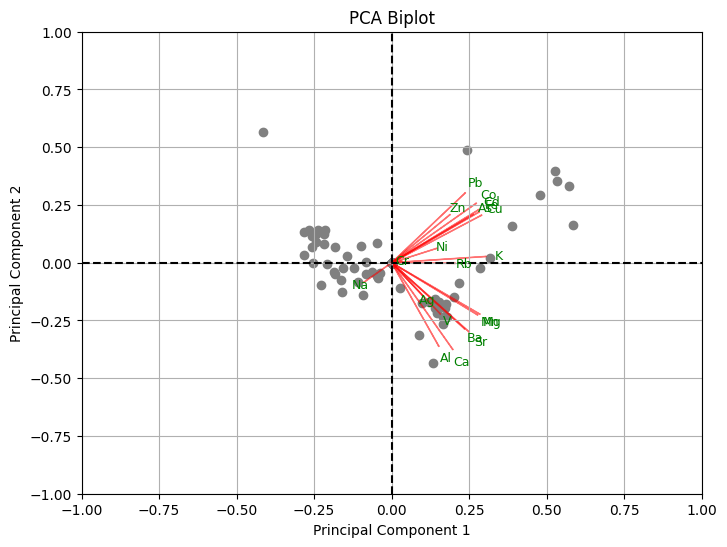

Explained variance by component:  [0.44963107 0.22007532]


In [12]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Specify the path to your dataset
data_dir = '/content/drive/MyDrive/Time Series'
file_path = f'{data_dir}/updatedlittlehope.txt'

# Columns you want to analyze (excluding 'Mn.1')
columns_to_use = ['As', 'Mn', 'Zn', 'Pb', 'Cd', 'Ni', 'Co', 'Cr', 'Fe', 'Mg', 'V', 'Ca', 'Cu', 'Ag', 'Al', 'Sr', 'Ba', 'Na', 'K', 'Rb']

# Load the dataset with ISO-8859-1 encoding
data = pd.read_csv(file_path, sep='\t', usecols=columns_to_use, encoding='ISO-8859-1')

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

# Standardize the imputed data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Perform PCA
pca = PCA(n_components=2)  # Adjust n_components as needed
principalComponents = pca.fit_transform(data_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Adjusted biplot function
def biplot_adjusted(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    plt.figure(figsize=(8, 6))
    plt.scatter(xs * scalex, ys * scaley, c='gray')

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center', fontsize=9)
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center', fontsize=9)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title('PCA Biplot')
    plt.axhline(y=0, color='k', linestyle='--')
    plt.axvline(x=0, color='k', linestyle='--')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.grid(True)

# The loading scores for PCA
loadings = pca.components_.T

# Creating a biplot with adjusted text size and smaller plot
biplot_adjusted(principalComponents, loadings, labels=columns_to_use)
plt.show()

# Print explained variance
print("Explained variance by component: ", pca.explained_variance_ratio_)


In [ ]:
def load_data(file_name, data_dir='/content/drive/MyDrive/Time Series'):
    file_path = f'{data_dir}/{file_name}'
    data = pd.read_csv(file_path, sep='\t', encoding='ISO-8859-1')
    print(data.columns)  # Check if 'Depth' and 'Pb' are in the columns
    return data

data_payne = load_data('updatedlittlehope.txt')  # Test to see if columns are read correctly

Index(['BP', 'CE', 'TD', 'Core Depth (cm)', 'Magnetic Susceptibility (SI)',
       'Weight % Organic', '% CaCO3', 'Dry Bulk Density (g/cc)',
       'Bulk Density Interpolated (g/cc)', 'Sed Rate ', 'Mass Acc Rate ',
       '?¹?N ( AIR)', 'd13C uncorrected (permil, vs VPDB)', '%N', '%C', 'C/N',
       '?¹³Corg ( VPDB)', 'As', 'As Flux', 'As EF Al', 'As EF K', 'Mn', 'Zn',
       'Zn Flux', 'Zn EF Al', 'Zn EF K', 'Pb', 'Pb Flux', 'Pb EF Al',
       'Pb EF K', 'Cd', 'Cd Flux', 'Ni', 'Ni Flux', 'Co', 'Co Flux', 'Mn.1',
       'Mn Flux ', 'Cr', 'Cr Flux', 'Fe', 'Fe Flux', 'Mg', 'Mg Flux',
       'Mg EF Al ', 'Mg EF K', 'V', 'V Flux', 'Ca', 'Ca Flux', 'Cu', 'Cu Flux',
       'Ag', 'Ag Flux', 'Al', 'Al Flux', 'Sr', 'Sr Flux', 'Ba', 'Ba Flux',
       'Na', 'Na Flux', 'K', 'K FLux', 'Rb', 'Rb.1', 'FeMn'],
      dtype='object')


SyntaxError: incomplete input (<ipython-input-19-cb28be149507>, line 47)

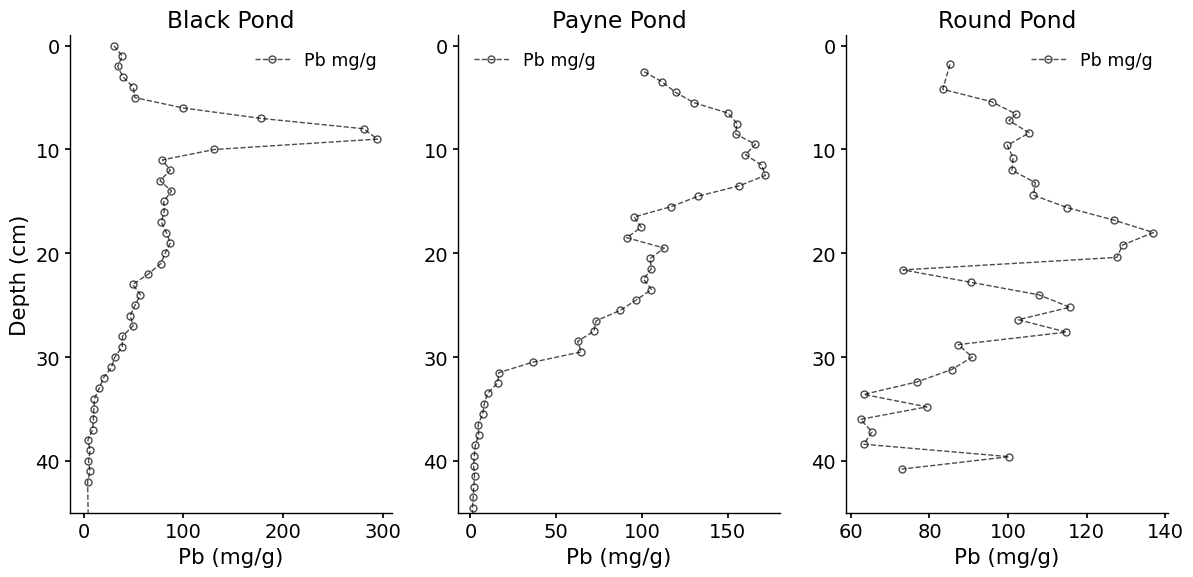

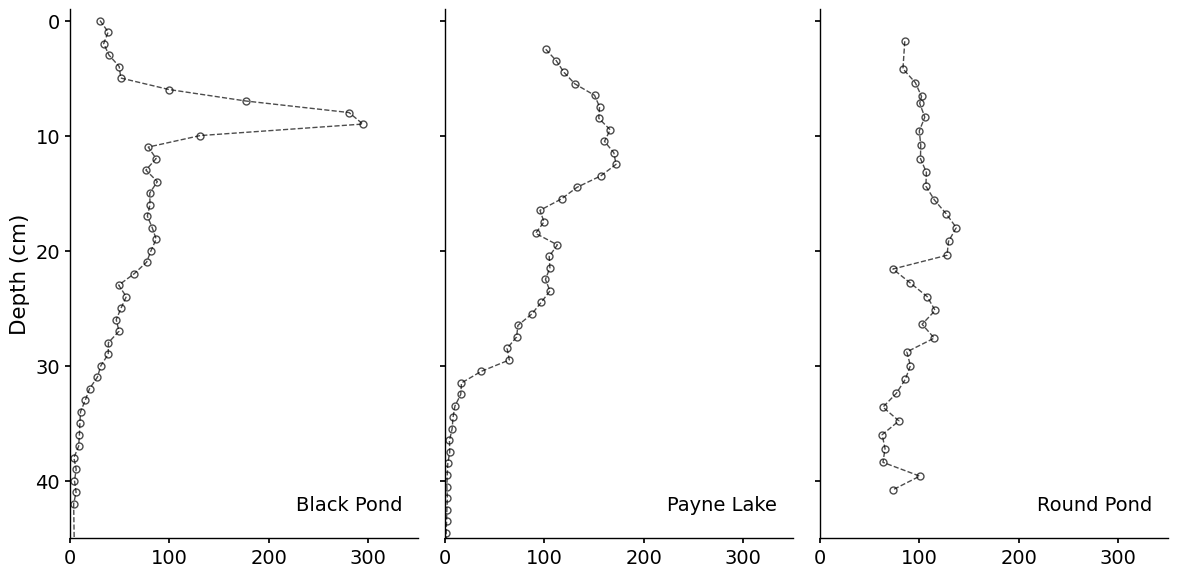

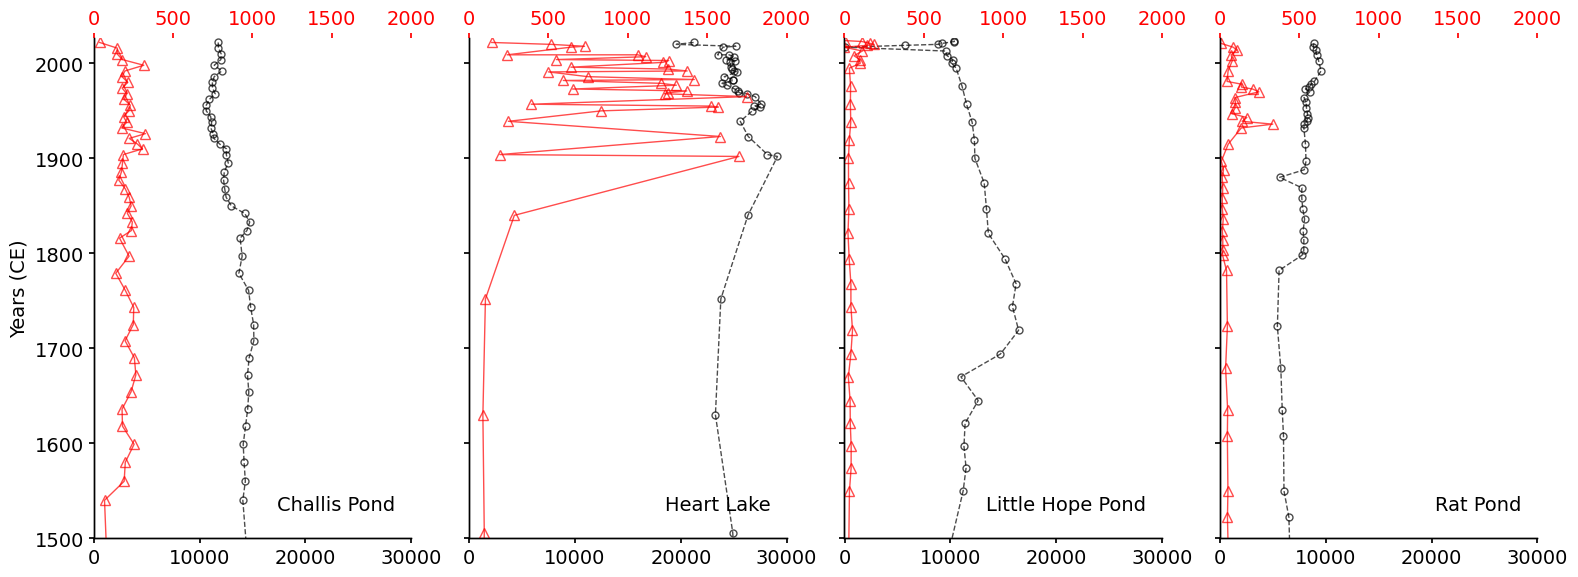

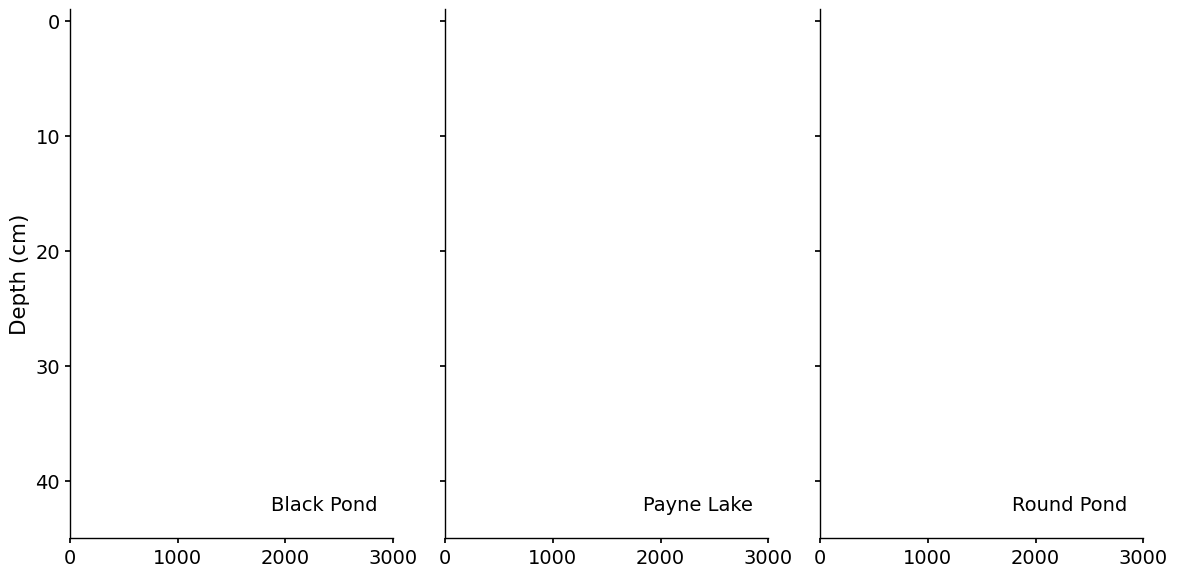

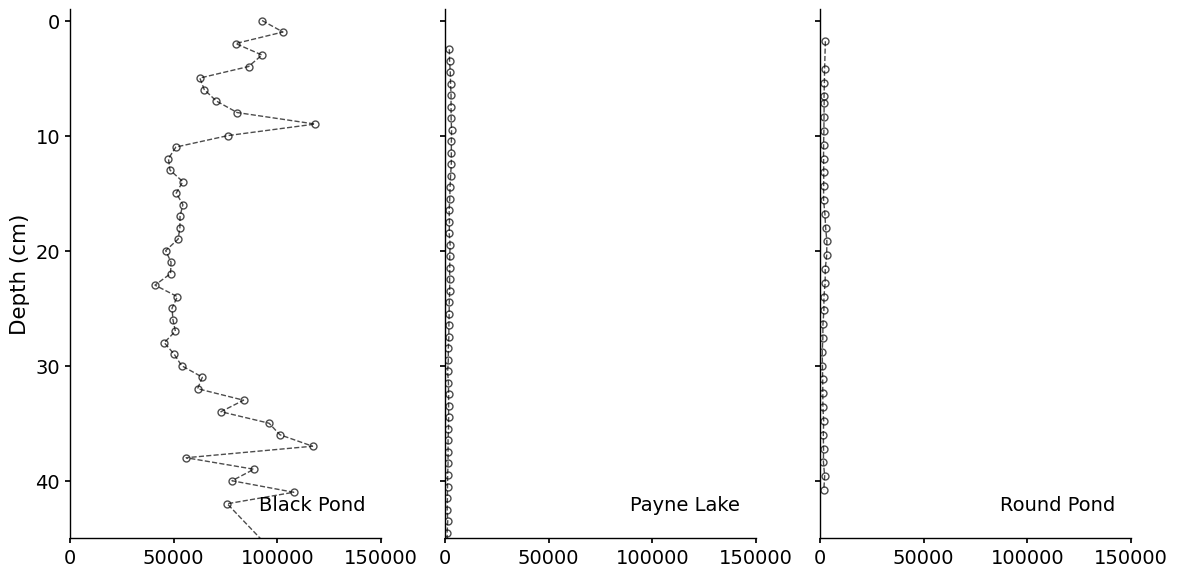

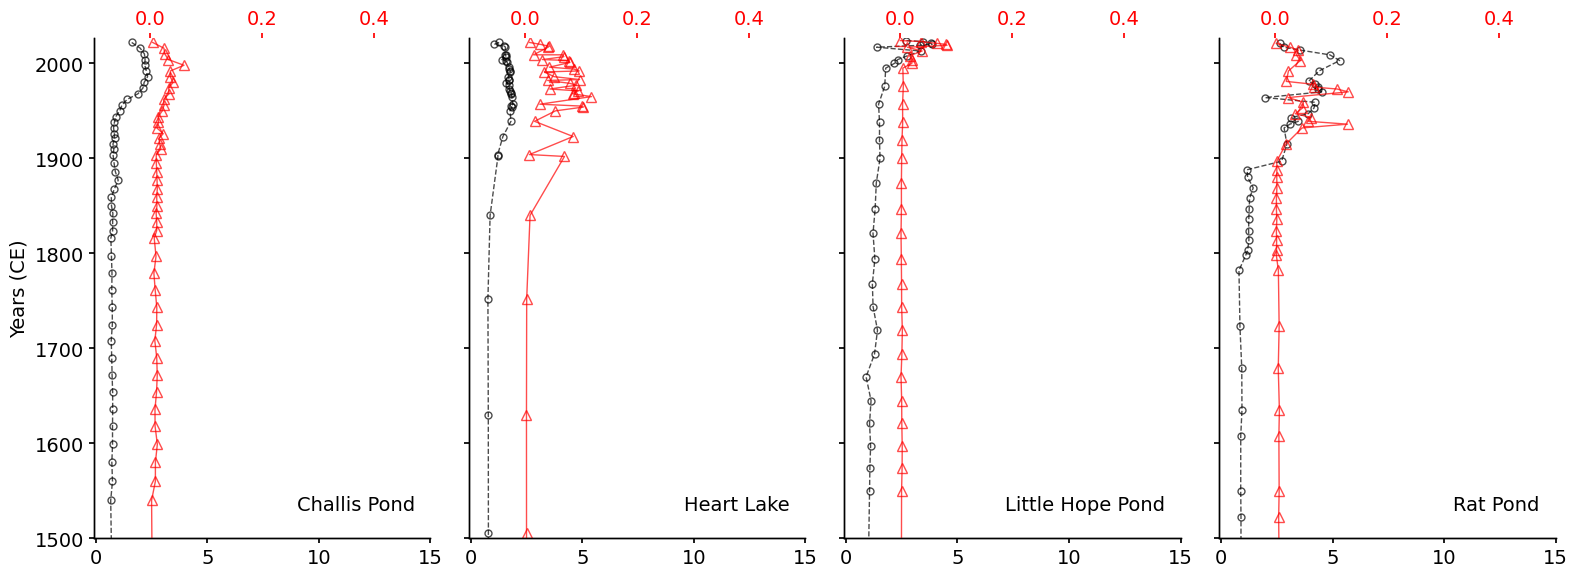

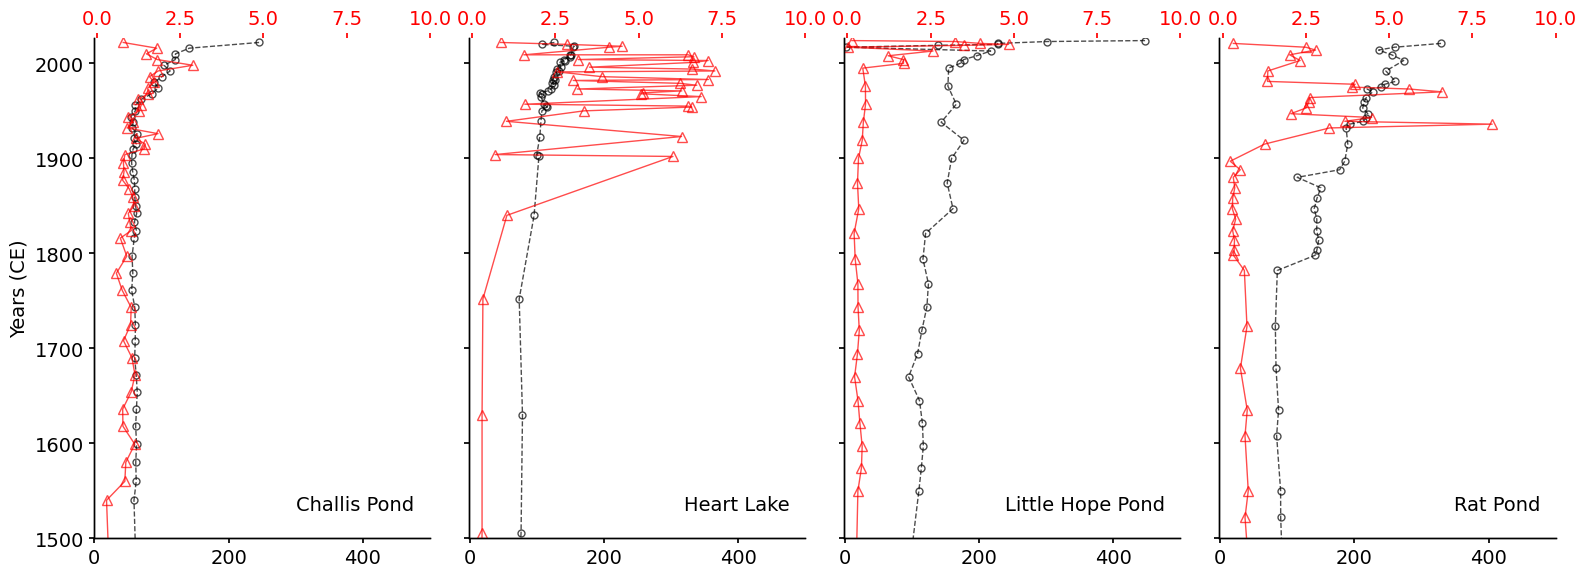

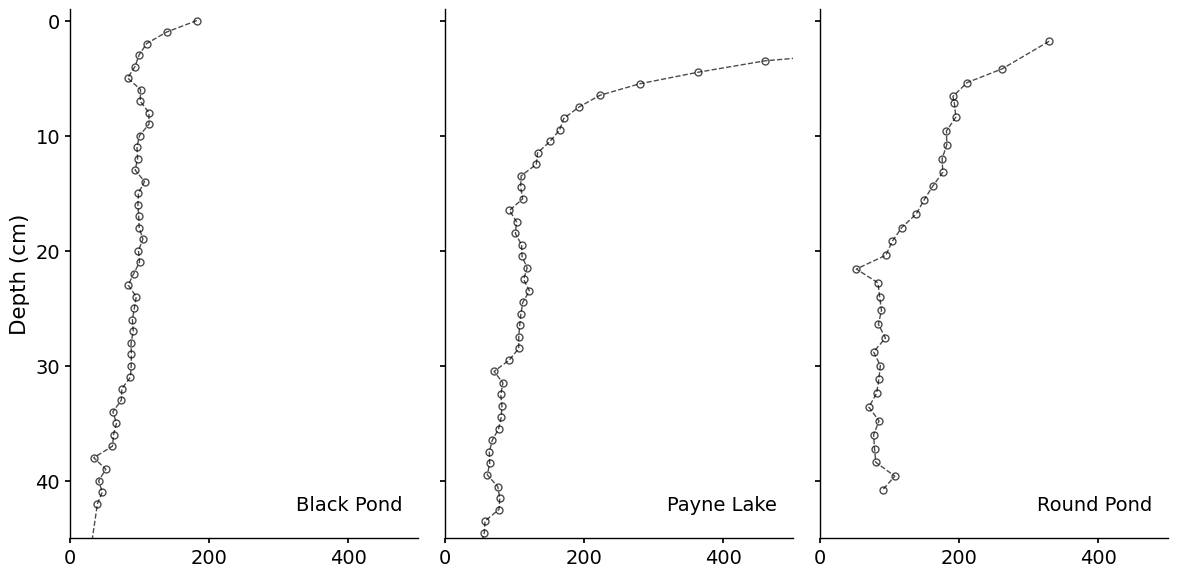

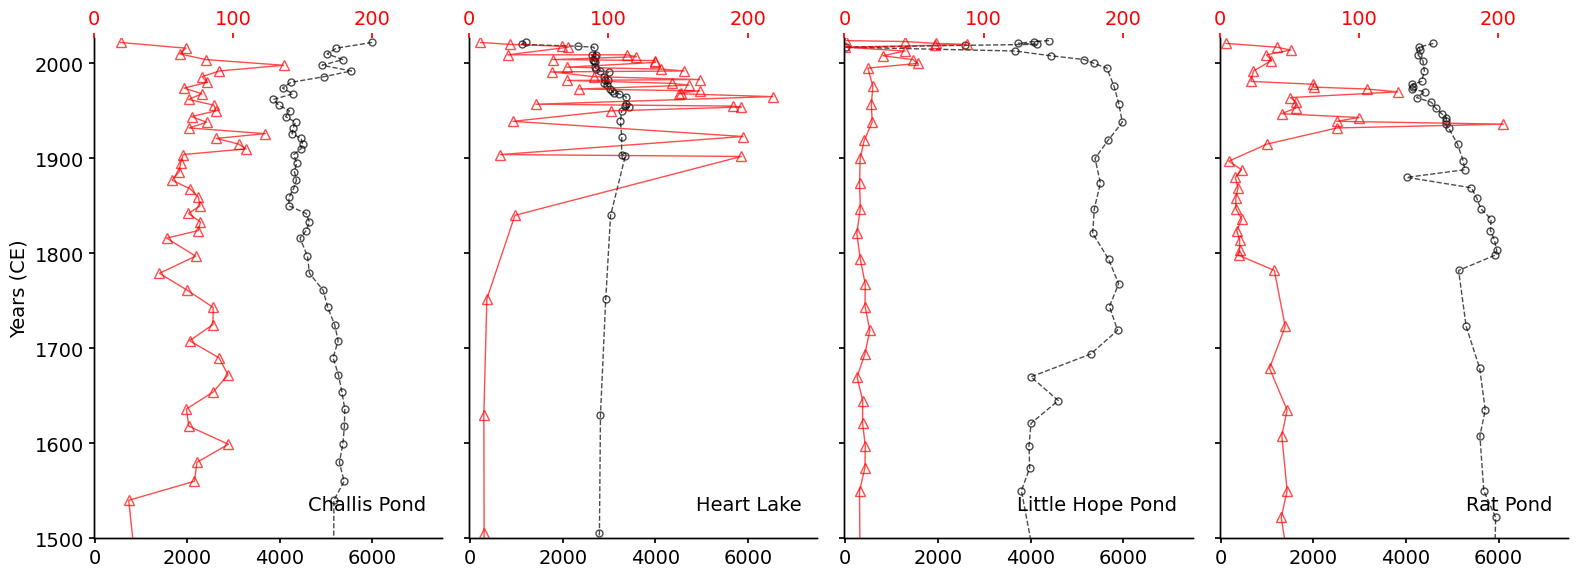

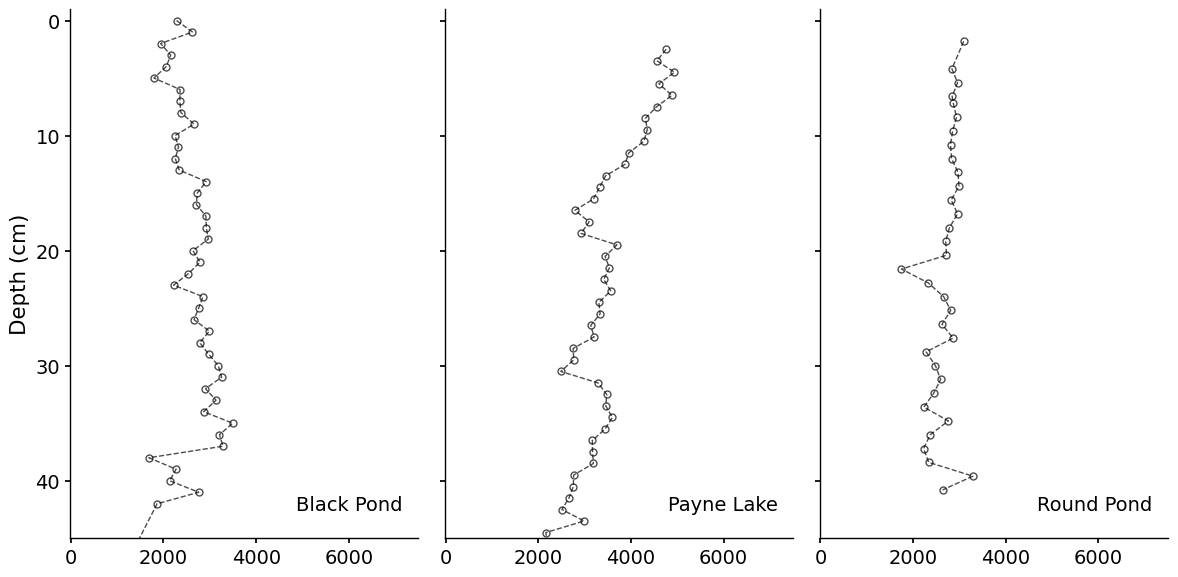

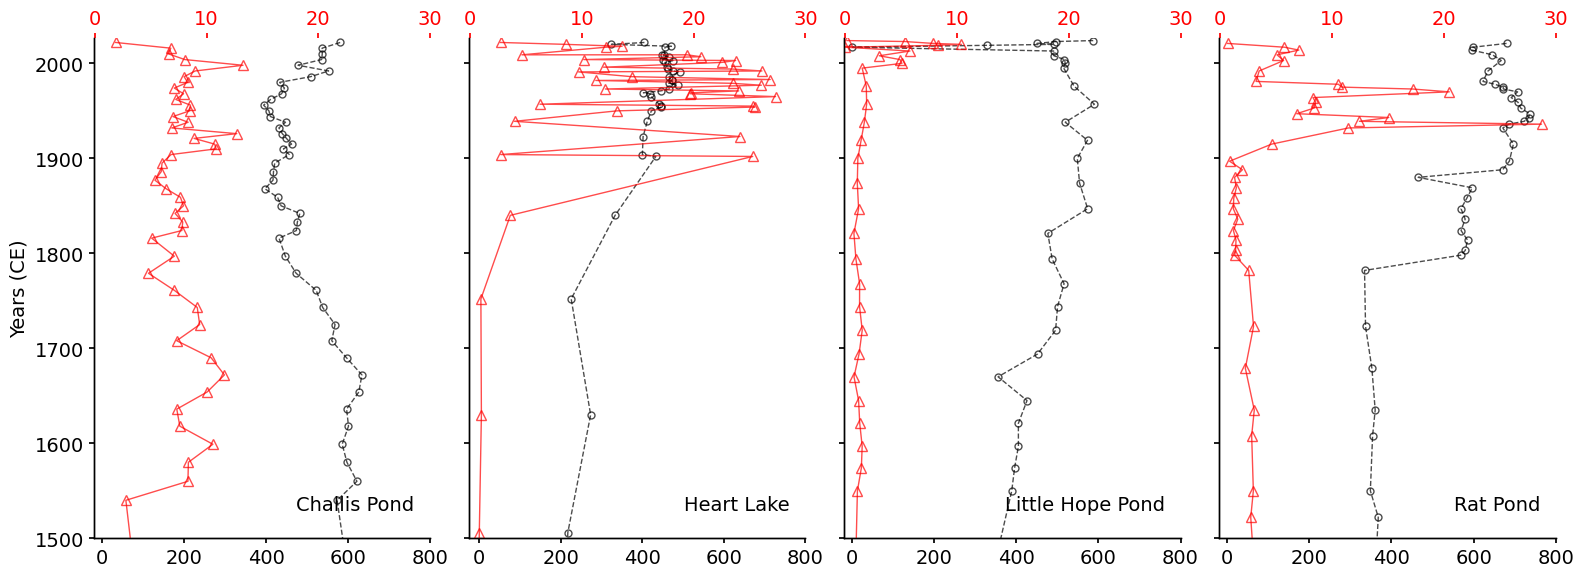

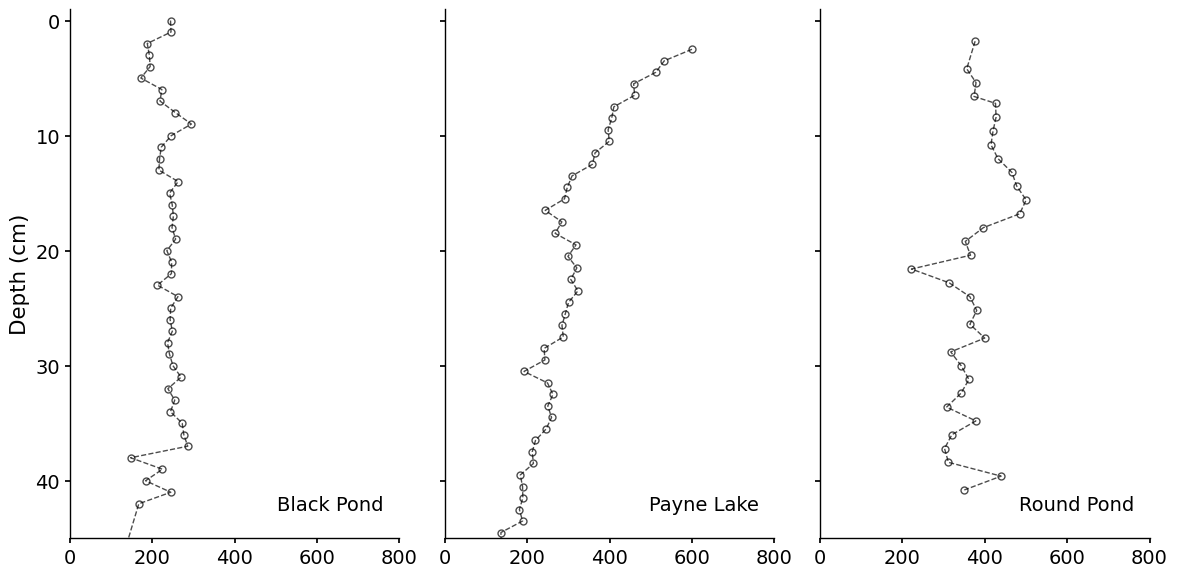

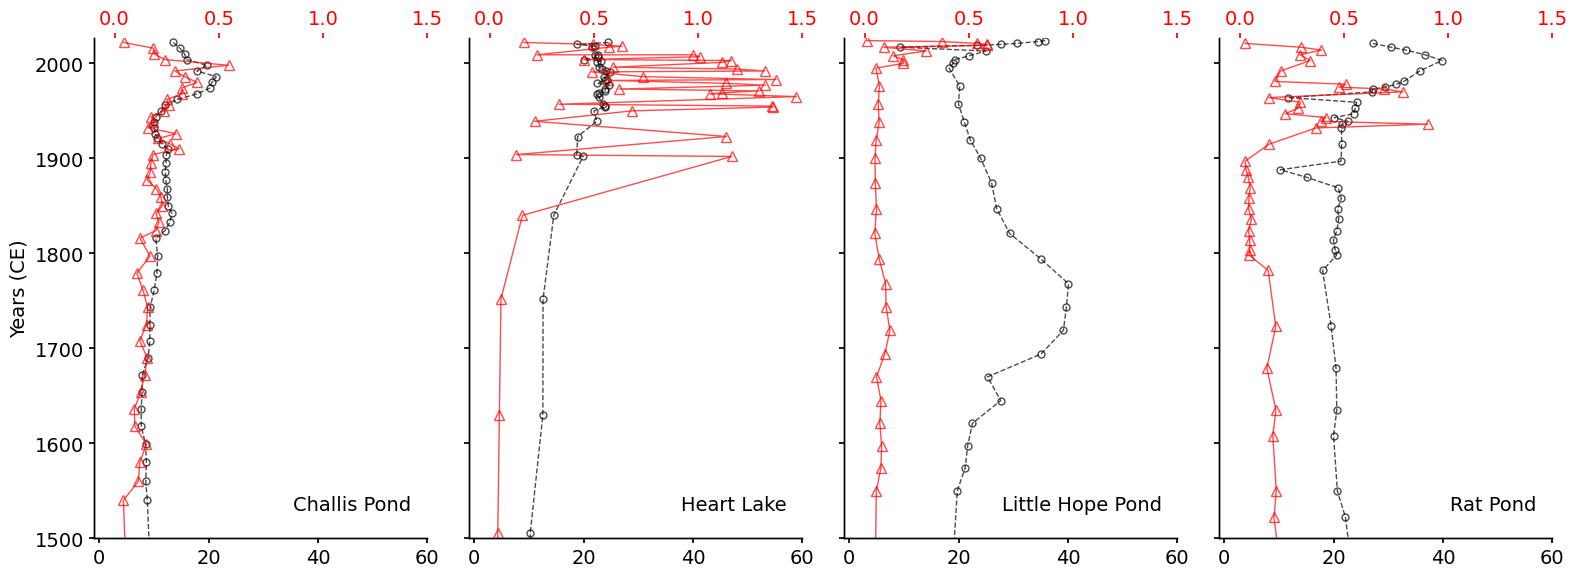

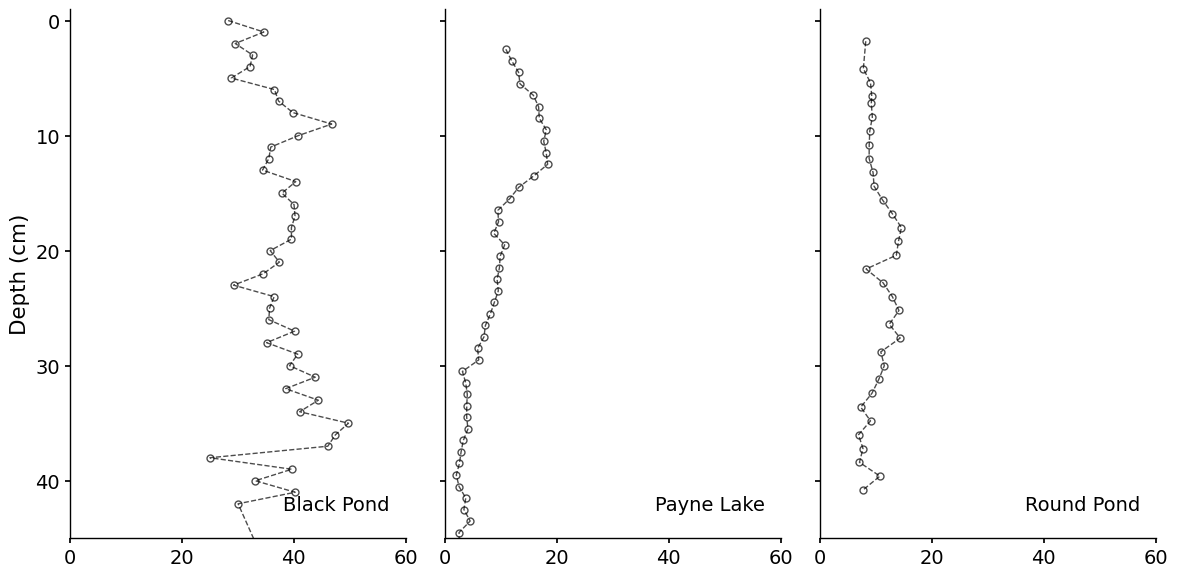

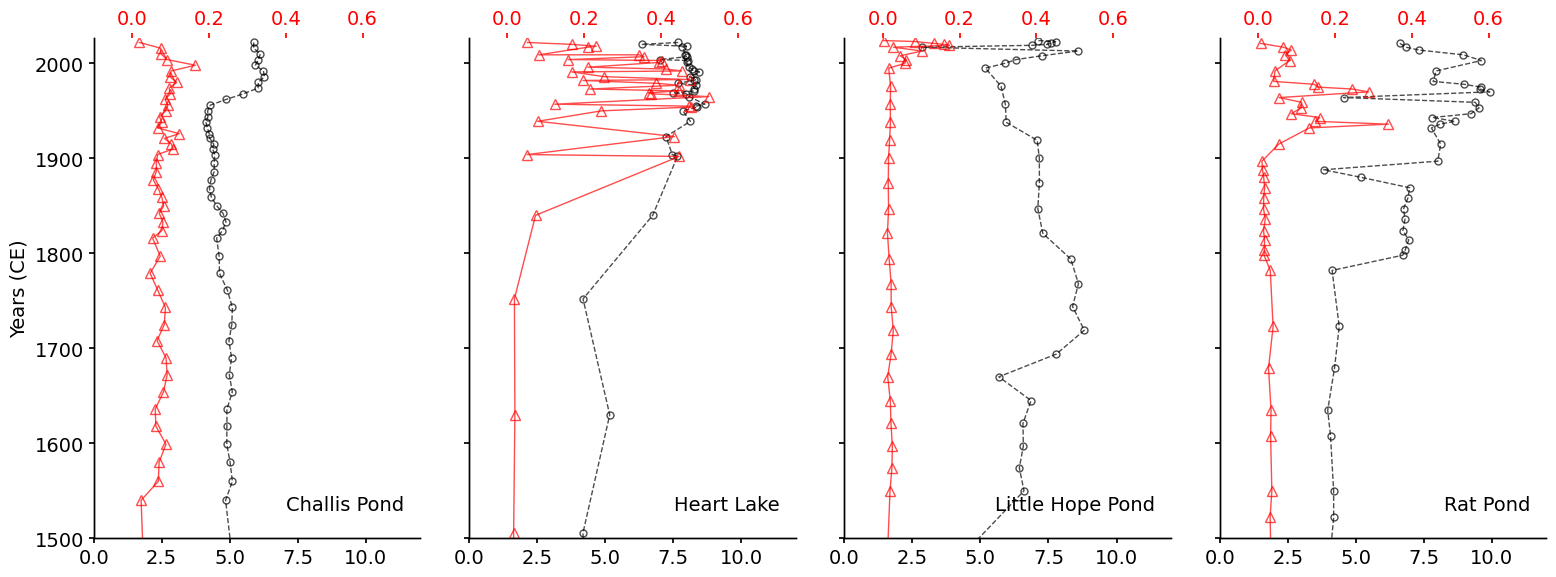

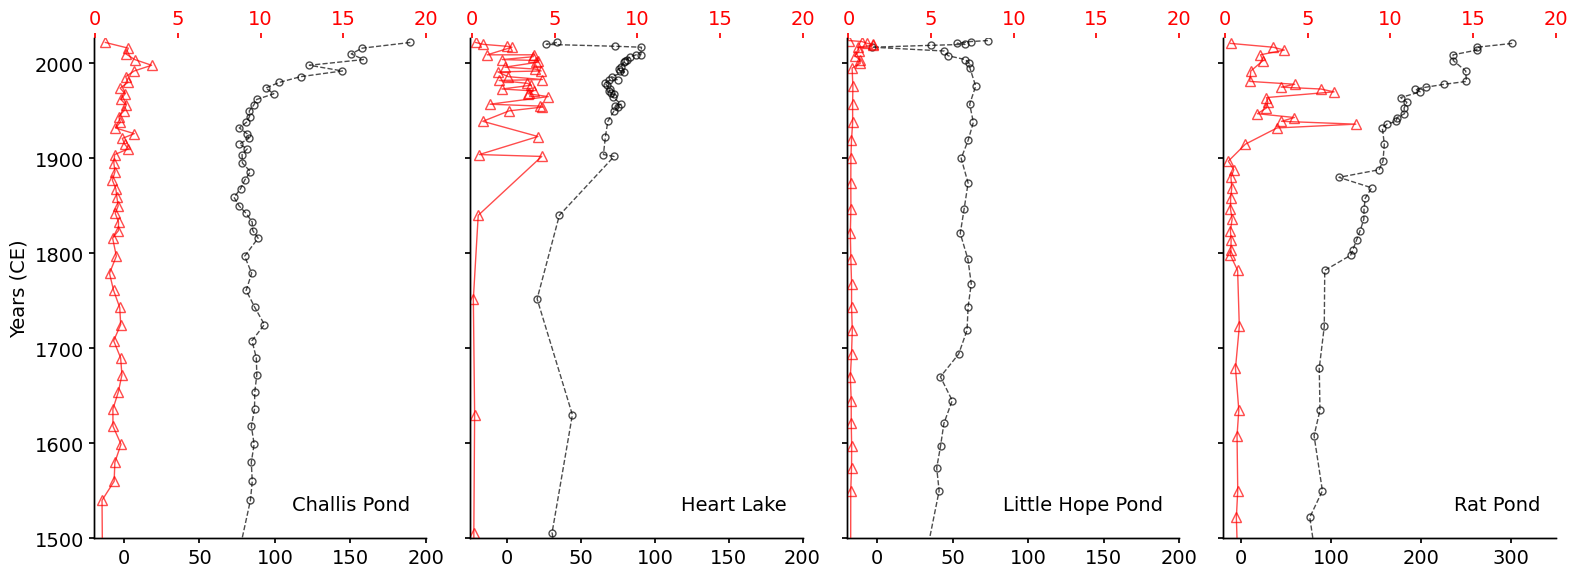

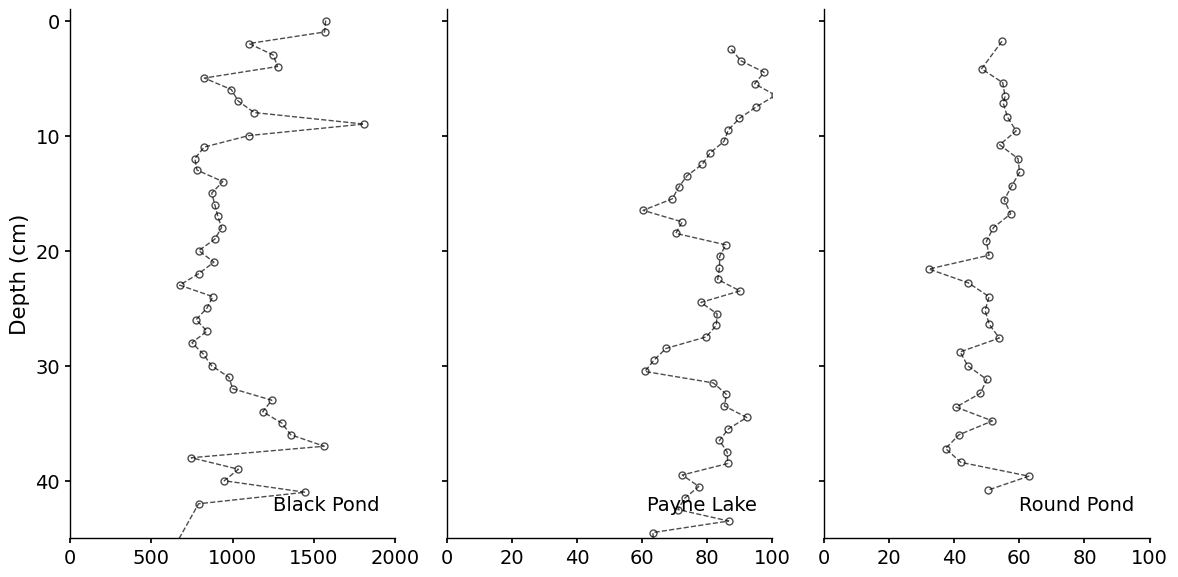

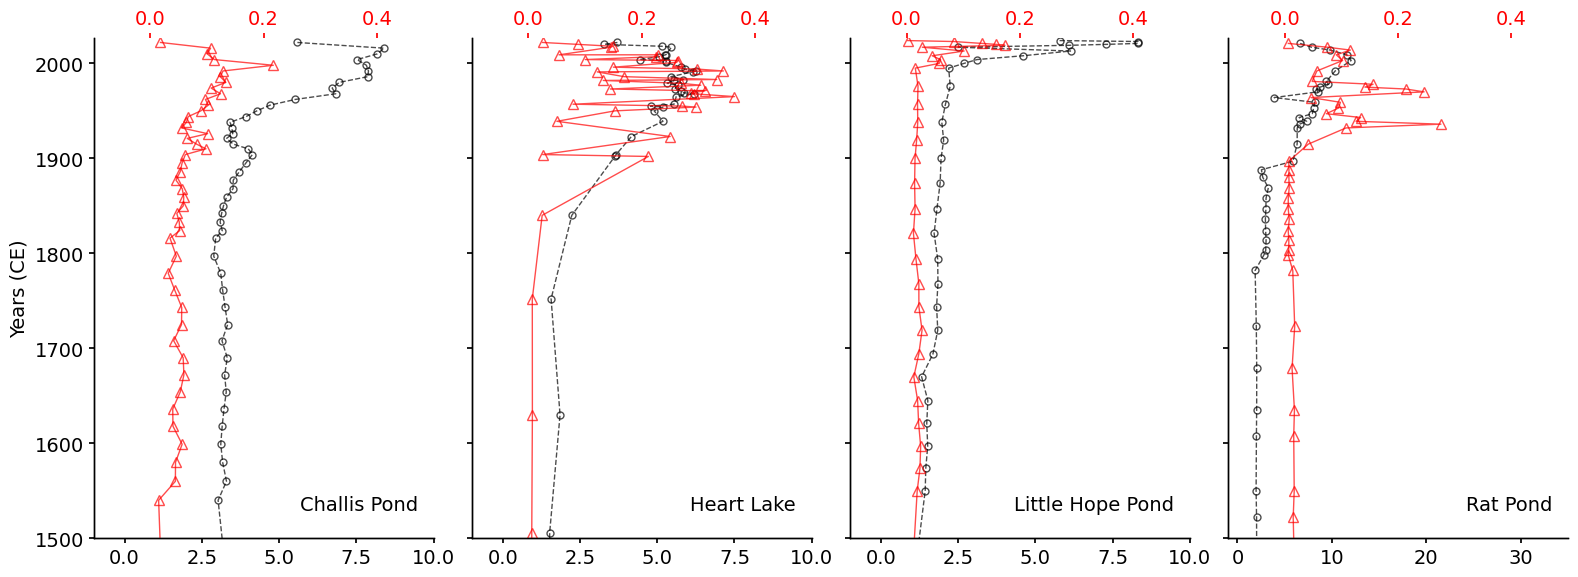

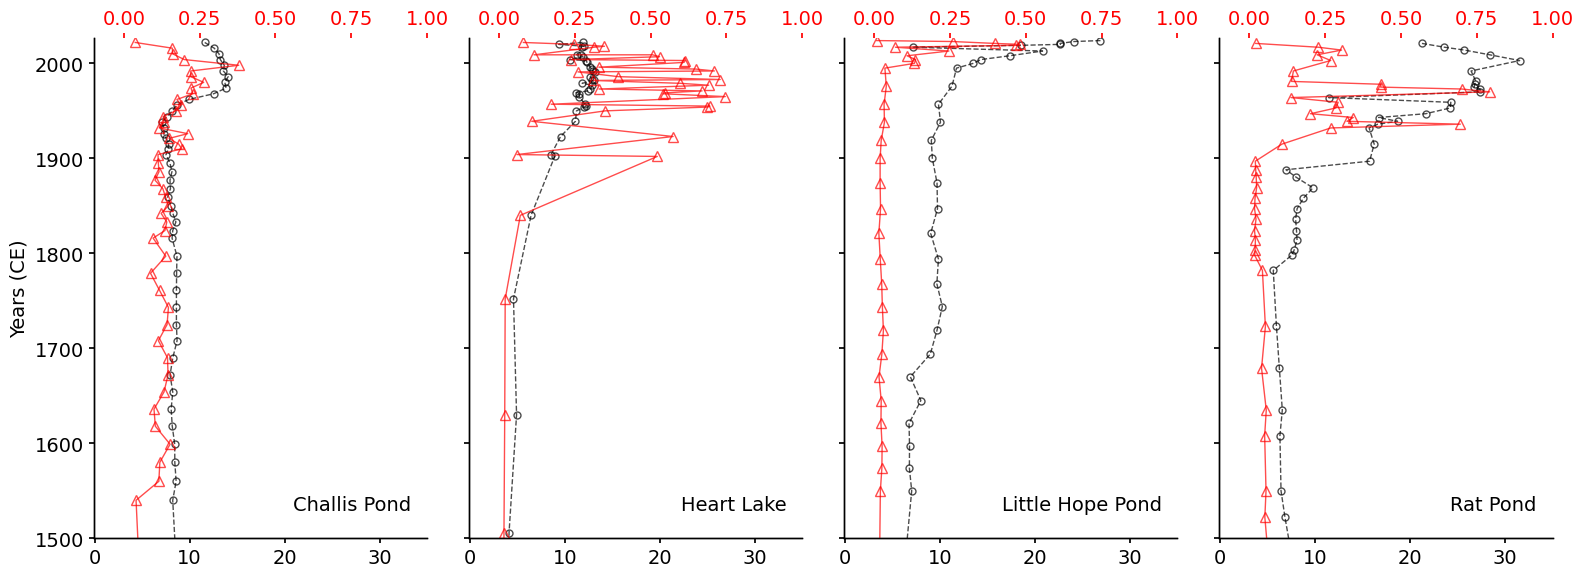

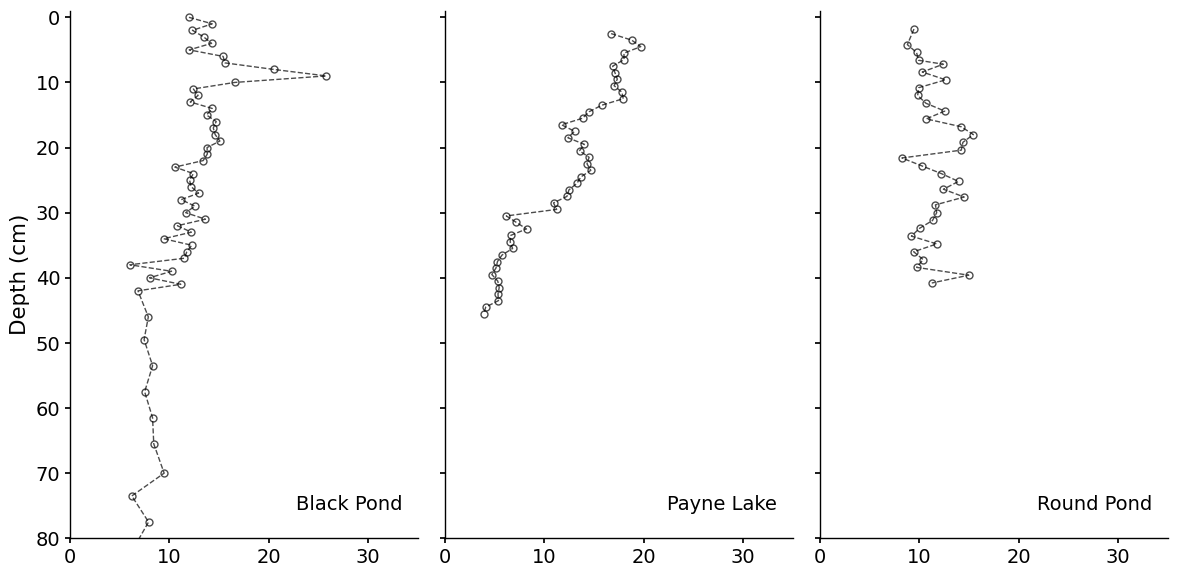

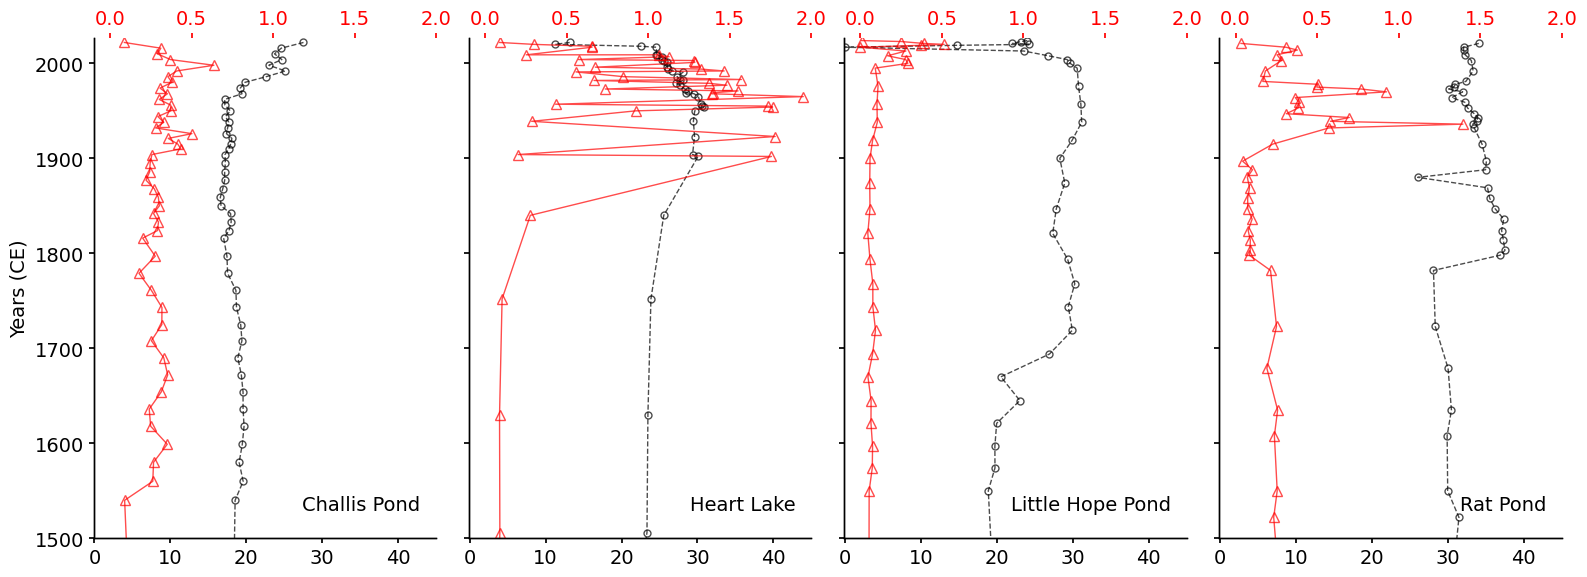

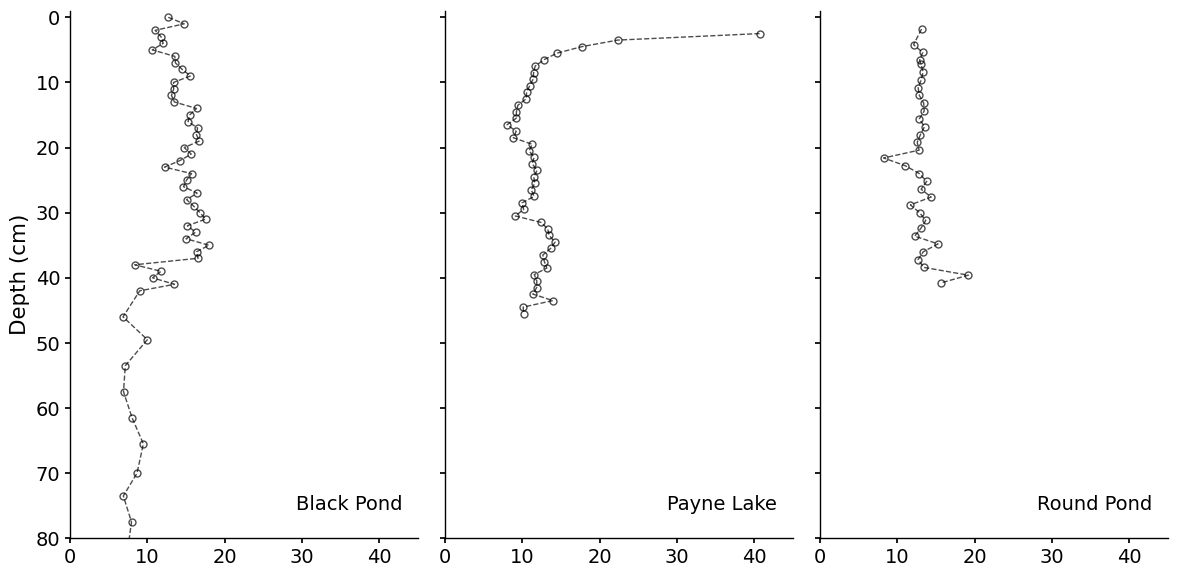

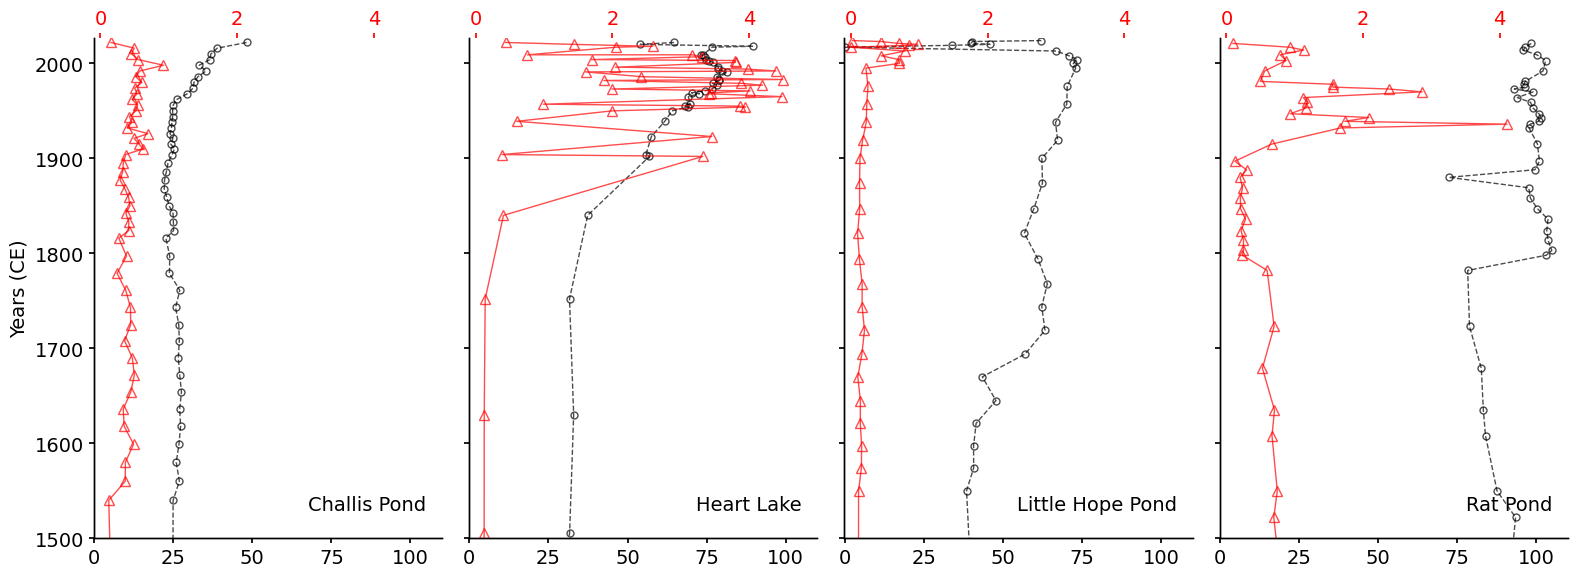

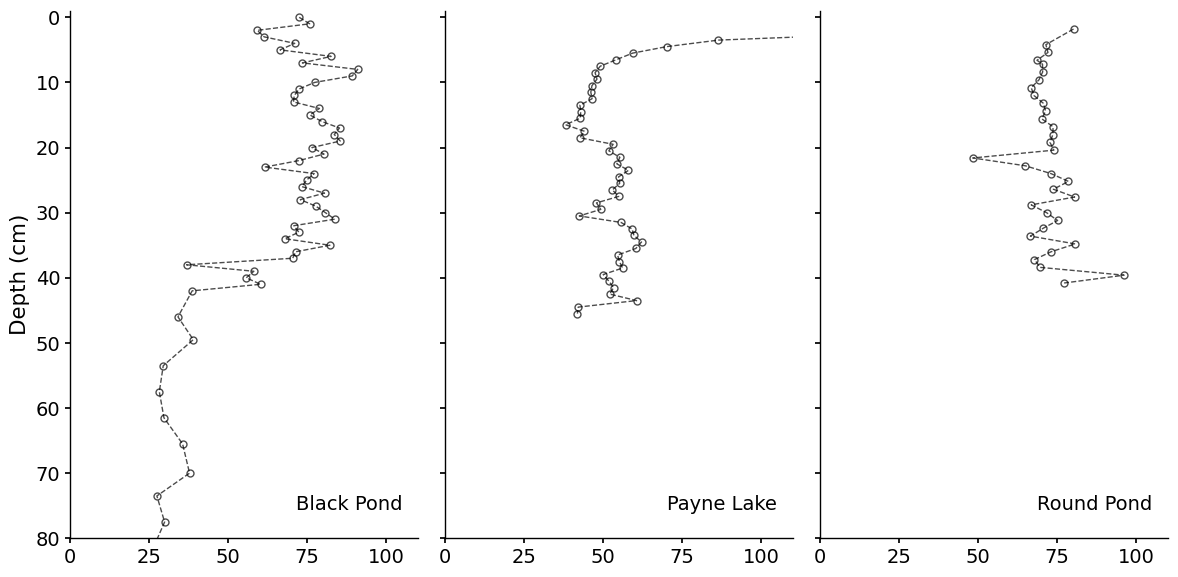

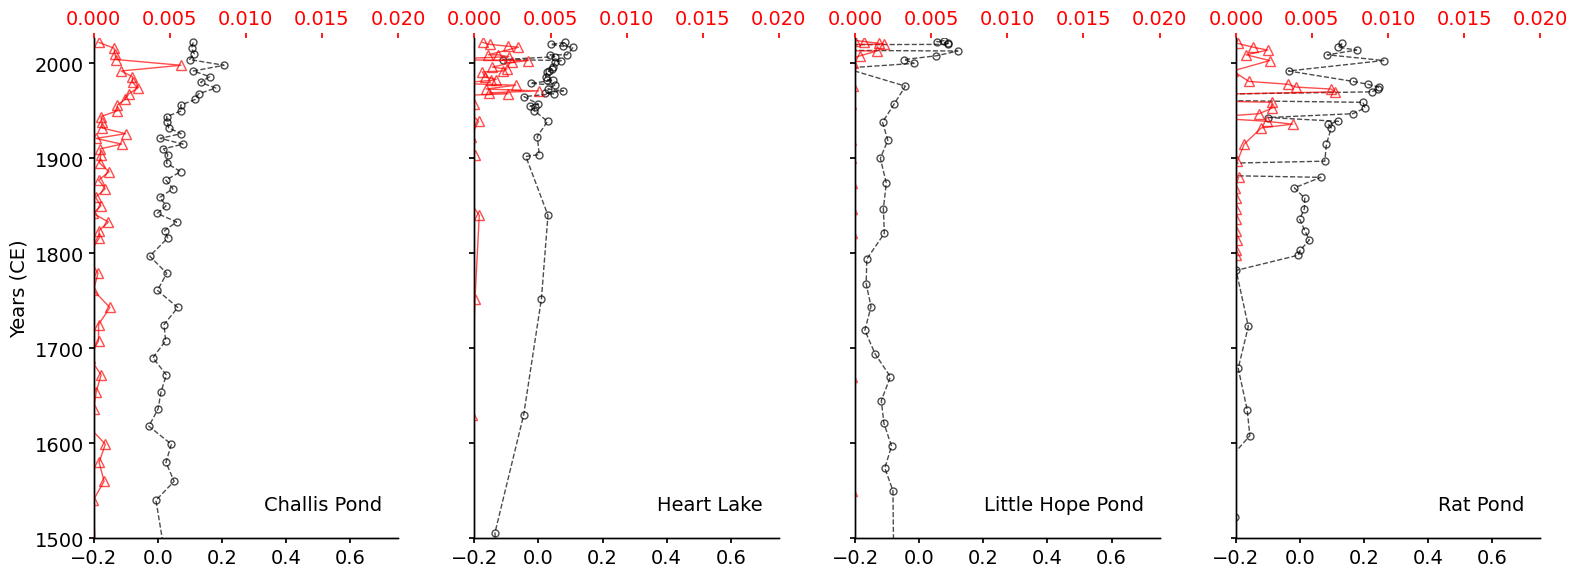

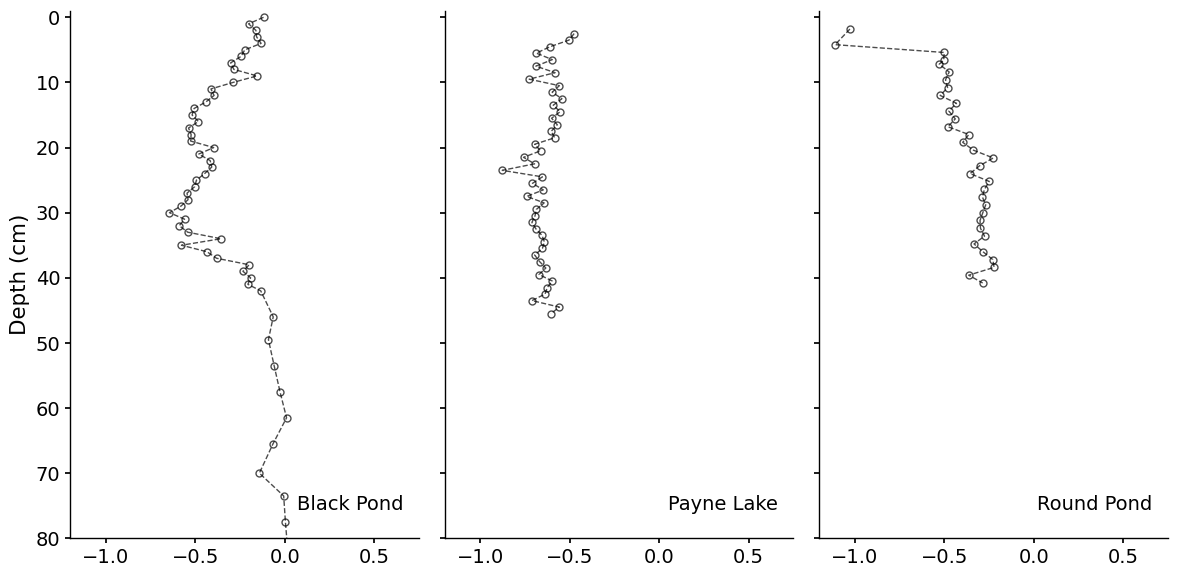

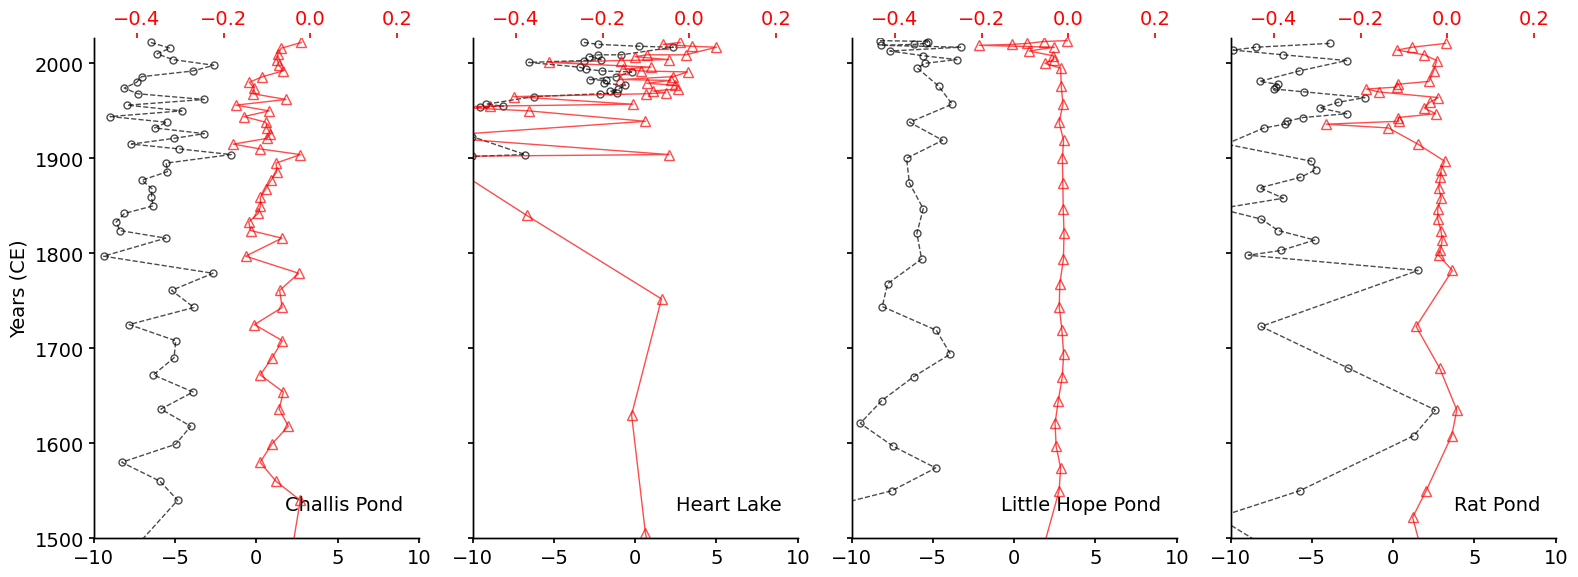

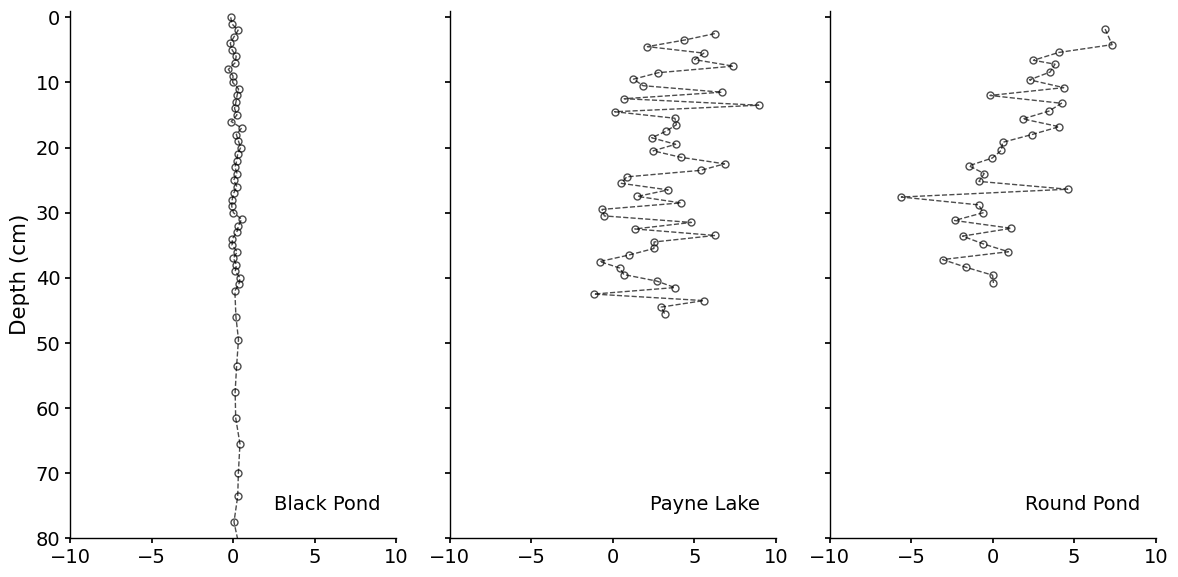

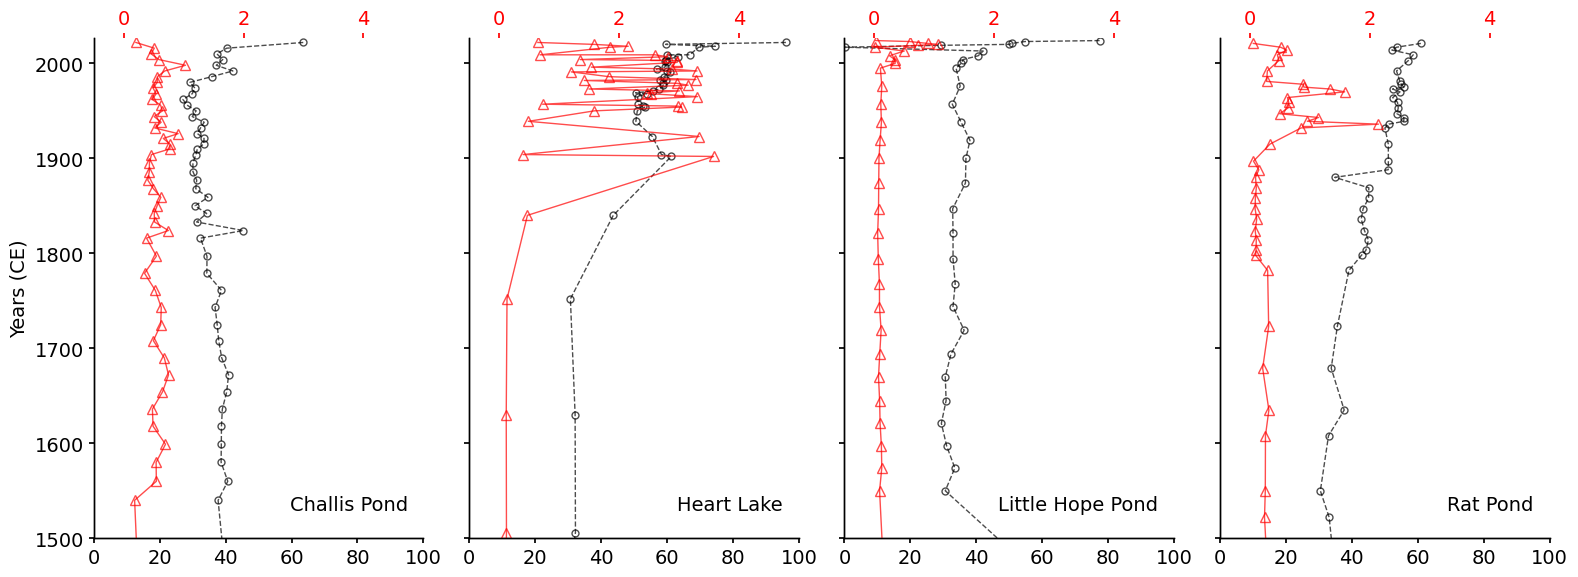

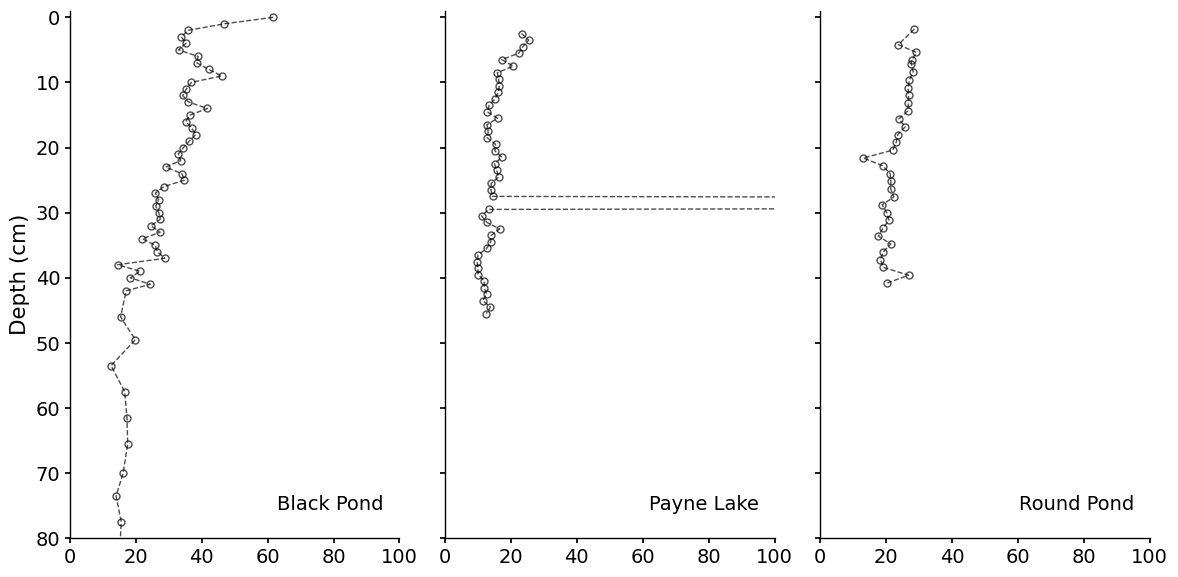

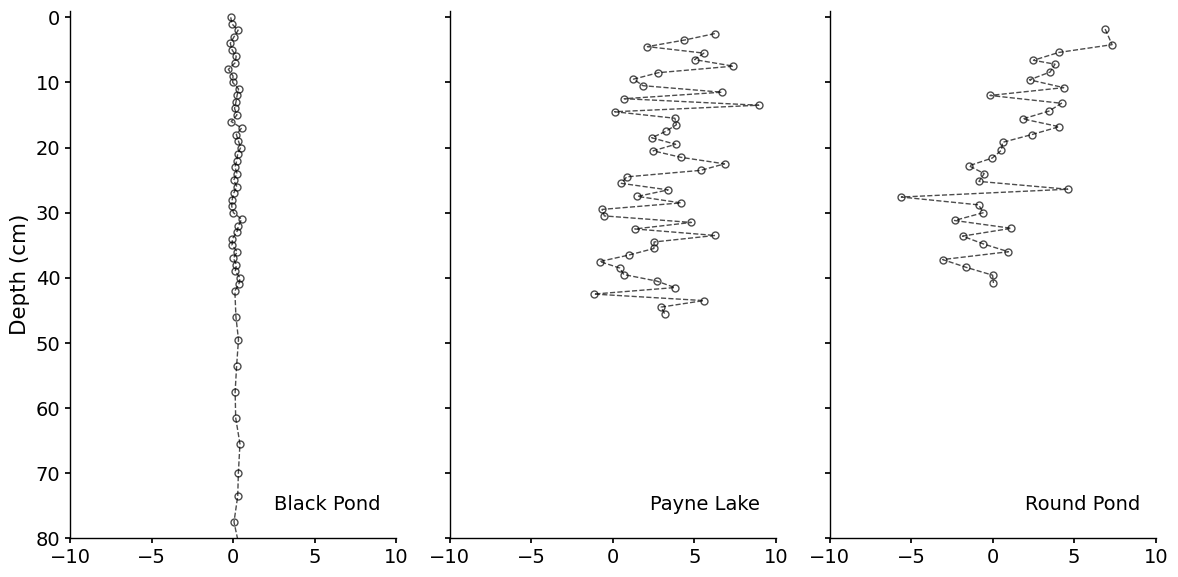

In [ ]:
def load_data(file_name, data_dir='/content/drive/MyDrive/Time Series'):
    file_path = f'{data_dir}/{file_name}'
    data = pd.read_csv(file_path, sep='\t', encoding='ISO-8859-1')
    print(data.columns)  # Check if 'Depth' and 'Pb' are in the columns
    return data

data_payne = load_data('Payne.txt')  # Test to see if columns are read correctly

Index(['Core', 'Depth ', 'End', 'Weight Organic', 'DBD', 'Sedrate', 'MAR',
       'As', 'As Flux', 'Mn', 'Mn Flux', 'Zn', 'Zn Flux', 'Pb', 'Pb Flux',
       'Cd', 'Cd Flux', 'Ni', 'Ni Flux', 'Co', 'Co FLux', 'Mn.1', 'Mn Flux.1',
       'Cr', 'Cr Flux', 'Fe', 'Fe Flux', 'Mg', 'Mg Flux', 'V', 'V Flux', 'Ca',
       'Ca Flux', 'Cu', 'Cu Flux', 'Ag', 'Ag Flux', 'Al', 'Al Flux', 'Sr',
       'Sr Flux', 'Ba', 'Ba Flux', 'Na', 'Na FLux', 'K', 'K Flux', 'Rb'],
      dtype='object')


In [ ]:
def load_data(file_name, data_dir='/content/drive/MyDrive/Time Series'):
    file_path = f'{data_dir}/{file_name}'
    data = pd.read_csv(file_path, sep='\t', encoding='ISO-8859-1')
    print(data.columns)  # Check if 'Depth' and 'Pb' are in the columns
    return data

data_payne = load_data('heartupdated.txt')  # Test to see if columns are read correctly

Index(['BP', 'CE', 'TD', 'Core Depth', 'Weightorganic', 'MS', 'DBD',
       'Sed rate ', 'MAR', '15N', 'd13C uncorrected', 'N', 'C', 'CN', '13C',
       'As', 'As Flux', 'As EF Al', 'As EF K', 'Mn', 'Mn Flux', 'Zn',
       'Zn Flux', 'Zn EF Al', 'Zn EF K', 'Pb', 'Pb Flux', 'Pb EF Al ',
       'Pb EF K ', 'Cd', 'Cd Flux', 'Ni', 'Ni Flux', 'Co', 'Co Flux', 'Mn.1',
       'Mn Flux.1', 'Cr', 'Cr Flux', 'Fe', 'Fe Flux', 'Mg', 'Mg Flux',
       'Mg EF Al', 'Mg EF K', 'V', 'V Flux', 'Ca', 'Ca Flux', 'Cu', 'Cu Flux',
       'Ag', 'Ag Flux', 'Al', 'Al Flux', 'Sr', 'Sr Flux', 'Ba', 'Ba Flux',
       'Na', 'Na Flux', 'K', 'K Flux', 'Rb', 'Rb Flux ', 'FeMn'],
      dtype='object')


In [ ]:
def load_data(file_name, data_dir='/content/drive/MyDrive/Time Series'):
    file_path = f'{data_dir}/{file_name}'
    data = pd.read_csv(file_path, sep='\t', encoding='ISO-8859-1')
    print(data.columns)  # Check if 'Depth' and 'Pb' are in the columns
    return data

data_payne = load_data('Ratupdated.txt')  # Test to see if columns are read correctly

Index(['BP', 'Years (CE)', 'Total Depth (cm)', 'Core Depth (cm)',
       'Magnetic Susceptibility (SI)', 'Dry Bulk Density (g/cc)',
       'Sed rate (cm/yr)', 'Mass Acc Rate (g/cm2/yr)', 'Weight % Organic',
       '?¹?N ( AIR)', 'd13C uncorrected ', '%N', '%C', 'C/N',
       '?¹³Corg ( VPDB)', 'As', 'As Flux', 'As EF Al', 'As EF K', 'Mn', 'Zn',
       'Zn Flux ', 'Zn EF Al ', 'Zn EF K', 'Pb', 'Pb Flux', 'Pb EF Al',
       'Pb EF K', 'Cd', 'Cd Flux', 'Ni', 'Ni Flux', 'Co', 'Co Flux', 'Mn.1',
       'Mn Flux', 'Cr', 'Cr Flux', 'Fe', 'Fe Flux', 'Mg', 'Mg Flux',
       'Mg EF Al', 'Mg EF K', 'V', 'V Flux', 'Ca', 'Ca Flux', 'Cu', 'Cu Flux',
       'Ag', 'Ag Flux', 'Al', 'Al Flux', 'Sr', 'Sr Flux', 'Ba', 'Ba Flux',
       'Na', 'Na Flux', 'K', 'K Flux', 'Rb', 'Rb Flux', 'Fe (moles/kg)',
       'Mn (moles/kg)', 'FeMn', 'Unnamed: 67', 'Unnamed: 68', 'Unnamed: 69',
       'Unnamed: 70'],
      dtype='object')


In [ ]:
def load_data(file_name, data_dir='/content/drive/MyDrive/Time Series'):
    file_path = f'{data_dir}/{file_name}'
    data = pd.read_csv(file_path, sep='\t', encoding='ISO-8859-1')
    print(data.columns)  # Check if 'Depth' and 'Pb' are in the columns
    return data

data_payne = load_data('updatedlittlehope.txt')  # Test to see if columns are read correctly

Index(['BP', 'CE', 'TD', 'Core Depth (cm)', 'Magnetic Susceptibility (SI)',
       'Weight % Organic', '% CaCO3', 'Dry Bulk Density (g/cc)',
       'Bulk Density Interpolated (g/cc)', 'Sed Rate ', 'Mass Acc Rate ',
       '?¹?N ( AIR)', 'd13C uncorrected (permil, vs VPDB)', '%N', '%C', 'C/N',
       '?¹³Corg ( VPDB)', 'As', 'As Flux', 'As EF Al', 'As EF K', 'Mn', 'Zn',
       'Zn Flux', 'Zn EF Al', 'Zn EF K', 'Pb', 'Pb Flux', 'Pb EF Al',
       'Pb EF K', 'Cd', 'Cd Flux', 'Ni', 'Ni Flux', 'Co', 'Co Flux', 'Mn.1',
       'Mn Flux ', 'Cr', 'Cr Flux', 'Fe', 'Fe Flux', 'Mg', 'Mg Flux',
       'Mg EF Al ', 'Mg EF K', 'V', 'V Flux', 'Ca', 'Ca Flux', 'Cu', 'Cu Flux',
       'Ag', 'Ag Flux', 'Al', 'Al Flux', 'Sr', 'Sr Flux', 'Ba', 'Ba Flux',
       'Na', 'Na Flux', 'K', 'K FLux', 'Rb', 'Rb.1', 'FeMn'],
      dtype='object')


In [ ]:
def load_data(file_name, data_dir='/content/drive/MyDrive/Time Series'):
    file_path = f'{data_dir}/{file_name}'
    data = pd.read_csv(file_path, sep='\t', encoding='ISO-8859-1')
    print(data.columns)  # Check if 'Depth' and 'Pb' are in the columns
    return data

data_payne = load_data('Challisupdated.txt')  # Test to see if columns are read correctly

Index(['BP', 'CE', 'TDcm', 'Core Depth (m)', 'AD/BC',
       'Magnetic Susceptibility ', 'Weightorganic', 'CaCO3', 'Inorganic',
       'DBD', 'DBDInterpol', 'Sedrate', 'MAR', '15N', 'd13C uncorrected', 'N',
       'C', 'CN', '13C', 'Phosphorous', 'Bsi', 'As', 'As Flux', 'As EF Al',
       'As EF K', 'Mn', 'Mn Flux', 'Zn', 'Zn Flux', 'Zn EF Al', 'Zn EF K',
       'Pb', 'Pb Flux', 'Pb EF Al', 'Pb EF K', 'Cd', 'Cd Flux', 'Ni',
       'Ni Flux', 'Co', 'Co Flux', 'Mn.1', 'Mn Flux.1', 'Cr', 'Cr Flux', 'Fe',
       'Fe Flux', 'Mg', 'Mg Flux ', 'Mg EF Al', 'Mg EF K', 'V', 'V Flux', 'Ca',
       'Ca Flux', 'Cu', 'Cu Flux', 'Ag', 'Ag Flux', 'Al', 'Al Flux', 'Sr',
       'Sr Flux', 'Ba', 'Ba Flux', 'Na', 'Na Flux', 'K', 'K Flux', 'Rb',
       'Rb Flux', 'Fe/Mn', 'Unnamed: 72'],
      dtype='object')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading data for Challis Pond
data_dir_challis = '/content/drive/MyDrive/Time Series'
data_challis = pd.read_csv(data_dir_challis+'/Challisupdated.txt', sep='\t')
non_nan_challis = data_challis[['CE', 'Pb Flux', 'Pb']].dropna()
dates_challis = non_nan_challis['CE'].tolist()
flux_challis = non_nan_challis['Zn Flux'].tolist()
pb_challis = non_nan_challis['Zn'].tolist()

# Reading data for Heart Lake
data_dir_heart = '/content/drive/MyDrive/Time Series'
data_heart = pd.read_csv(data_dir_heart+'/Heartupdated.txt', sep='\t')
non_nan_heart = data_heart[['CE', 'Pb Flux', 'Pb']].dropna()
dates_heart = non_nan_heart['CE'].tolist()
flux_heart = non_nan_heart['Zn Flux'].tolist()
pb_heart = non_nan_heart['Zn'].tolist()

# Reading data for Updated Little Hope
data_dir_little_hope = '/content/drive/MyDrive/Time Series'
data_little_hope = pd.read_csv(data_dir_little_hope+'/updatedlittlehope.txt', sep='\t', encoding='ISO-8859-1')
non_nan_little_hope = data_little_hope[['CE','Pb Flux', 'Pb']].dropna()
dates_little_hope = non_nan_little_hope['CE'].tolist()
flux_little_hope = non_nan_little_hope['Zn Flux'].tolist()
pb_little_hope = non_nan_little_hope['Zn'].tolist()

# Reading data for Rat Pond
data_dir_rat = '/content/drive/MyDrive/Time Series'
data_rat = pd.read_csv(data_dir_rat+'/Ratupdated.txt', sep='\t')
non_nan_rat = data_rat[['CE','Pb Flux', 'Pb']].dropna()
dates_rat = non_nan_rat['CE'].tolist()
flux_rat = non_nan_rat['Zn Flux'].tolist()
pb_rat = non_nan_rat['Zn'].tolist()

# Creating subplots
fig, axs = plt.subplots(1, 4, figsize=(16, 6), sharey=True)
ax1, ax3, ax5, ax7 = axs

# Plotting for Challis Pond
line1, = ax1.plot(pb_challis, dates_challis, label='Pb mg/g', linestyle='--', linewidth=1, alpha=0.7, color='black', marker='o', markerfacecolor='none', markersize=5)
ax2 = ax1.twiny()
line2, = ax2.plot(flux_challis, dates_challis, label='Pb Flux', linestyle='-', linewidth=1, alpha=0.7, color='red', marker='^', markerfacecolor='none', markersize=7)

# Customizing Challis Pond plots
ax1.set_ylabel('Years (CE)', fontsize=14)
ax1.set_xlabel('', color='black', fontsize=14)
ax2.set_xlabel('', color='red', fontsize=14)
ax2.tick_params(axis='x', colors='red')  # Red tick labels
ax2.spines['top'].set_color('red')  # Red top spine
ax1.set_ylim(1500, 2027)
ax1.set_xlim(-20, 350)
ax2.set_xlim(-0.1, 6.0)
ax1.grid(False)
ax2.grid(False)

# Adding legend for Challis Pond
ax1.legend(handles=[], loc='lower right', title='Challis Pond')

# Plotting for Heart Lake
line3, = ax3.plot(pb_heart, dates_heart, label='Pb mg/g', linestyle='--', linewidth=1, alpha=0.7, color='black', markerfacecolor='none', marker='o', markersize=5)
ax4 = ax3.twiny()
line4, = ax4.plot(flux_heart, dates_heart, label='Pb Flux', linestyle='-', linewidth=1, alpha=0.7, color='red', markerfacecolor='none', marker='^', markersize=7)

# Customizing Heart Lake plots
ax3.set_xlabel('', color='black', fontsize=14)
ax4.set_xlabel('', color='red', fontsize=14)
ax4.tick_params(axis='x', colors='red')  # Red tick labels
ax4.spines['top'].set_color('red')  # Red top spine
ax3.set_xlim(-25, 350)
ax4.set_xlim(-0.1, 6.0)
ax3.grid(False)
ax4.grid(False)

# Adding legend for Heart Lake
ax3.legend(handles=[], loc='lower right', title='Heart Lake')

# Plotting for Updated Little Hope
line5, = ax5.plot(pb_little_hope, dates_little_hope, label='Pb mg/g', linestyle='--', linewidth=1, alpha=0.7, markerfacecolor='none', color='black', marker='o', markersize=5)
ax6 = ax5.twiny()
line6, = ax6.plot(flux_little_hope, dates_little_hope, label='Pb Flux', linestyle='-', linewidth=1, alpha=0.7, markerfacecolor='none', color='red', marker='^', markersize=7)

# Customizing Updated Little Hope plots
ax5.set_xlabel('', color='black', fontsize=14)
ax6.set_xlabel('', color='red', fontsize=14)
ax6.tick_params(axis='x', colors='red')  # Red tick labels
ax6.spines['top'].set_color('red')  # Red top spine
ax5.set_xlim(-20, 350)
ax6.set_xlim(-0.1, 6.0)
ax5.grid(False)
ax6.grid(False)

# Adding legend for Updated Little Hope
ax5.legend(handles=[], loc='lower right', title='Little Hope Pond')

# Plotting for Rat Pond
line7, = ax7.plot(pb_rat, dates_rat, label='Pb mg/g', linestyle='--', linewidth=1, alpha=0.7, color='black', markerfacecolor='none', marker='o', markersize=5)
ax8 = ax7.twiny()
line8, = ax8.plot(flux_rat, dates_rat, label='Pb Flux', linestyle='-', linewidth=1, alpha=0.7, color='red', markerfacecolor='none', marker='^', markersize=7)

# Customizing Rat Pond plots
ax7.set_xlabel('', color='black', fontsize=14)
ax8.set_xlabel('', color='red', fontsize=14)
ax8.tick_params(axis='x', colors='red')  # Red tick labels
ax8.spines['top'].set_color('red')  # Red top spine
ax7.set_xlim(-20, 350)
ax8.set_xlim(-0.1, 6.0)
ax7.grid(False)
ax8.grid(False)

# Adding legend for Rat Pond
ax7.legend(handles=[line7,line8], loc='center',  title='')
ax7.legend(handles=[], loc='lower right',  title='Rat Pond')

plt.tight_layout()
plt.show()

KeyError: 'Zn Flux'

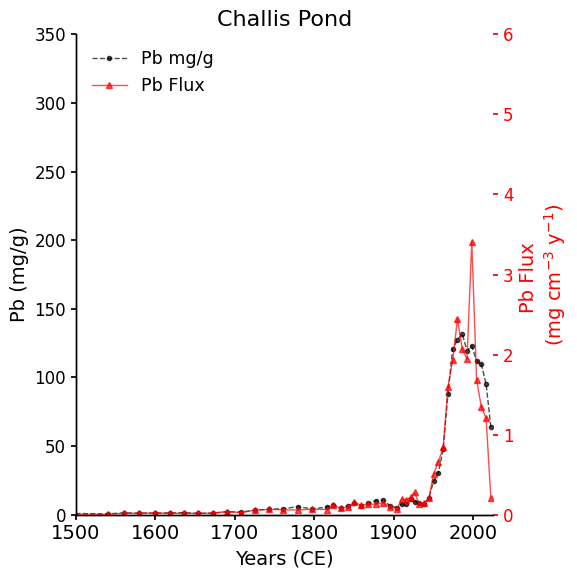

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Reading the data from the TXT file
data_dir = '/content/drive/MyDrive/Time Series'
data = pd.read_csv(data_dir+'/Challisupdated.txt', sep='\t')

non_nan_data5 = data[['CE','Pb Flux', 'Pb']].dropna()
dates_non_nan5 = non_nan_data5['CE'].tolist()
values_non_nan5_flux = non_nan_data5['Pb Flux'].tolist()
values_non_nan5_pb = non_nan_data5['Pb'].tolist()

# 2. Creating the plot
plt.figure(figsize=(6, 6))

# Creating axis for Pb
ax1 = plt.gca()
ax1.plot(dates_non_nan5, values_non_nan5_pb, label='Pb mg/g', linestyle='--', linewidth=1, alpha=0.7, color='black', marker='o', markersize=3)

# 3. Customizing the plot for Pb
ax1.set_title('Challis Pond', fontsize=16)
ax1.set_xlabel('Years (CE)', fontsize=14)  # Now years are on x-axis
ax1.set_ylabel('Pb (mg/g)', color='black', fontsize=14)  # Pb values are on y-axis
ax1.tick_params(axis='y', colors='black', labelsize=12)
ax1.grid(False)  # Ensuring gridlines are removed
ax1.set_xlim(1500, 2025)  # Setting the date range
ax1.set_ylim(0, 350)  # Setting the Pb axis range from 0 to 250

# Creating another y-axis for Pb Flux
ax2 = ax1.twinx()
ax2.plot(dates_non_nan5, values_non_nan5_flux, label='Pb Flux', linestyle='-', linewidth=1, alpha=0.7, color='red', marker='^', markersize=5)
ax2.grid(False)  # Additionally ensuring gridlines are removed for this axis as well

# 4. Customizing the plot for Pb Flux and setting the y-axis limits
ax2.set_ylabel('Pb Flux \n(mg cm$^{-3}$ y$^{-1}$)', color='red', fontsize=14)
ax2.tick_params(axis='y', colors='red', labelsize=12)
ax2.set_ylim(-0, 6.0)  # Adjusted for Pb Flux values

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# 6. Displaying the plot
plt.tight_layout()
plt.show()



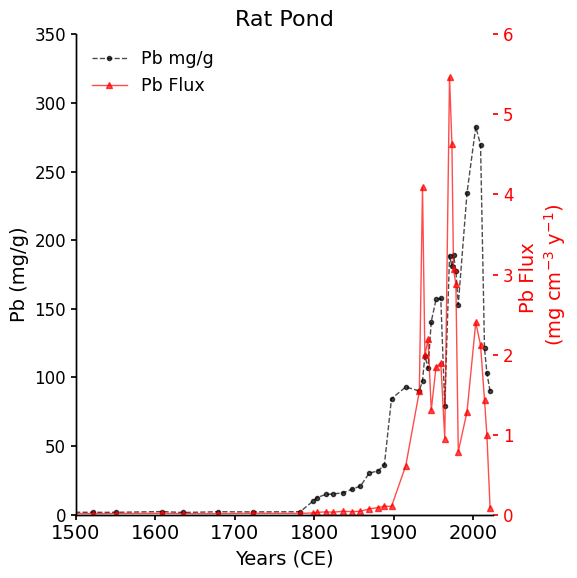

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Reading the data from the TXT file
data_dir = '/content/drive/MyDrive/Time Series'
data = pd.read_csv(data_dir+'/Ratupdated.txt', sep='\t')

non_nan_data5 = data[['CE','Pb Flux', 'Pb']].dropna()
dates_non_nan5 = non_nan_data5['CE'].tolist()
values_non_nan5_flux = non_nan_data5['Pb Flux'].tolist()
values_non_nan5_pb = non_nan_data5['Pb'].tolist()

# 2. Creating the plot
plt.figure(figsize=(6, 6))

# Creating axis for Pb
ax1 = plt.gca()
ax1.plot(dates_non_nan5, values_non_nan5_pb, label='Pb mg/g', linestyle='--', linewidth=1, alpha=0.7, color='black', marker='o', markersize=3)

# 3. Customizing the plot for Pb
ax1.set_title('Rat Pond', fontsize=16)
ax1.set_xlabel('Years (CE)', fontsize=14)  # Now years are on x-axis
ax1.set_ylabel('Pb (mg/g)', color='black', fontsize=14)  # Pb values are on y-axis
ax1.tick_params(axis='y', colors='black', labelsize=12)
ax1.grid(False)  # Ensuring gridlines are removed
ax1.set_xlim(1500, 2025)  # Setting the date range
ax1.set_ylim(0, 350) # Setting the Pb axis range from 0 to 250

# Creating another y-axis for Pb Flux
ax2 = ax1.twinx()
ax2.plot(dates_non_nan5, values_non_nan5_flux, label='Pb Flux', linestyle='-', linewidth=1, alpha=0.7, color='red', marker='^', markersize=5)
ax2.grid(False)  # Additionally ensuring gridlines are removed for this axis as well

# 4. Customizing the plot for Pb Flux and setting the y-axis limits
ax2.set_ylabel('Pb Flux \n(mg cm$^{-3}$ y$^{-1}$)', color='red', fontsize=14)
ax2.tick_params(axis='y', colors='red', labelsize=12)
ax2.set_ylim(-0, 6.0)  # Adjusted for Pb Flux values

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# 6. Displaying the plot
plt.tight_layout()
plt.show()

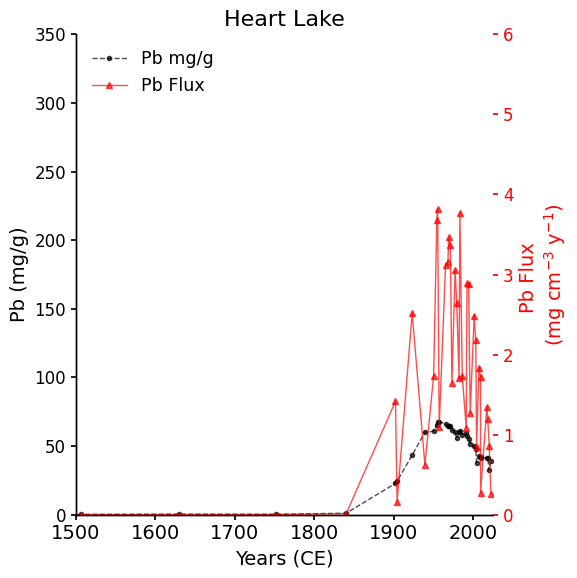

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Reading the data from the TXT file
data_dir = '/content/drive/MyDrive/Time Series'
data = pd.read_csv(data_dir+'/Heartupdated.txt', sep='\t')

non_nan_data5 = data[['CE','Pb Flux', 'Pb']].dropna()
dates_non_nan5 = non_nan_data5['CE'].tolist()
values_non_nan5_flux = non_nan_data5['Pb Flux'].tolist()
values_non_nan5_pb = non_nan_data5['Pb'].tolist()

# 2. Creating the plot
plt.figure(figsize=(6, 6))

# Creating axis for Pb
ax1 = plt.gca()
ax1.plot(dates_non_nan5, values_non_nan5_pb, label='Pb mg/g', linestyle='--', linewidth=1, alpha=0.7, color='black', marker='o', markersize=3)

# 3. Customizing the plot for Pb
ax1.set_title('Heart Lake', fontsize=16)
ax1.set_xlabel('Years (CE)', fontsize=14)  # Now years are on x-axis
ax1.set_ylabel('Pb (mg/g)', color='black', fontsize=14)  # Pb values are on y-axis
ax1.tick_params(axis='y', colors='black', labelsize=12)
ax1.grid(False)  # Ensuring gridlines are removed
ax1.set_xlim(1500, 2025)  # Setting the date range
ax1.set_ylim(0, 350)  # Setting the Pb axis range from 0 to 250

# Creating another y-axis for Pb Flux
ax2 = ax1.twinx()
ax2.plot(dates_non_nan5, values_non_nan5_flux, label='Pb Flux', linestyle='-', linewidth=1, alpha=0.7, color='red', marker='^', markersize=5)
ax2.grid(False)  # Additionally ensuring gridlines are removed for this axis as well

# 4. Customizing the plot for Pb Flux and setting the y-axis limits
ax2.set_ylabel('Pb Flux \n(mg cm$^{-3}$ y$^{-1}$)', color='red', fontsize=14)
ax2.tick_params(axis='y', colors='red', labelsize=12)
ax2.set_ylim(-0, 6.0)  # Adjusted for Pb Flux values

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# 6. Displaying the plot
plt.tight_layout()
plt.show()

[nan, 41.89, nan, nan, nan, 38.94, nan, nan, nan, 39.17, nan, nan, nan, 44.13, nan, nan, nan, 37.49, nan, nan, nan, 34.33, nan, nan, nan, 34.19, nan, nan, nan, 32.53, nan, nan, nan, 32.47, nan, nan, nan, 33.73, nan, nan, nan, 35.74, nan, nan, nan, 36.35, nan, nan, nan, 33.9, nan, nan, nan, 30.89, nan, nan, nan, 33.39, nan, nan, 38.91, nan, nan, nan, 39.23, nan, nan, nan, 39.76, nan, nan, nan, 40.05, nan, nan, nan, 39.41, nan, nan, nan, 39.97, nan, nan, nan, 40.33, nan, nan, nan, 39.22, nan, nan, nan, 39.01, nan, nan, nan, 38.57, nan, nan, nan, 40.07, nan, nan, nan, 39.84, nan, nan, nan, 39.11, nan, nan, nan, 36.72, nan, nan, nan, 37.07, nan, nan, nan, 36.83, nan, nan, nan, 35.27, nan, nan, nan, 35.54, nan, nan, nan, 36.76, nan, nan, nan, 36.33, nan, nan, nan, 35.61, nan, nan, nan, 36.11, nan, nan, nan, 36.64, nan, nan, nan, 36.74, nan, nan, nan, 36.47, nan, nan, nan, 37.68, nan, nan, nan, 41.39, nan, nan, nan, 41.02, nan, nan, nan, 41.07, nan, nan, nan, 40.73, nan, nan, nan, 40.36, nan

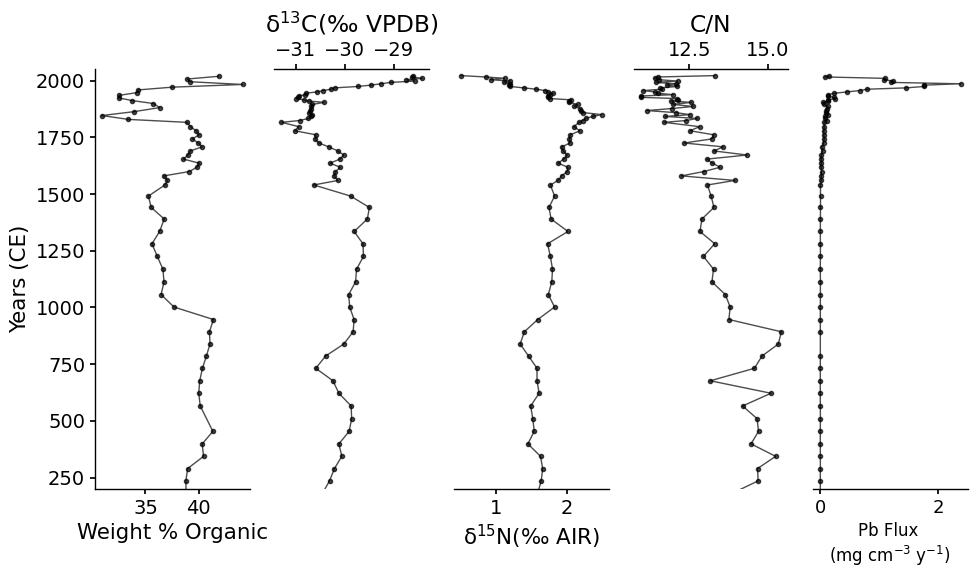

In [ ]:
# 1. Reading the data from the TXT file
data_dir = '/content/drive/MyDrive/Time Series'
# Open the dataset assuming it's a CSV file, change to pd.read_table for TSV files
data = pd.read_csv(data_dir+'/Challisdata.txt', sep='\t')
dates = data['CE'].tolist()
values1 = data['Weightorganic'].tolist()
values2 = data['13C'].tolist()
values3 = data['15N'].tolist()
values4 = data['CN'].tolist()
values4 = data['Pb Flux'].tolist()
print(values1)

non_nan_data1 = data[['CE','Weightorganic']].dropna()
non_nan_data2 = data[['CE','13C']].dropna()
non_nan_data3 = data[['CE','15N']].dropna()
non_nan_data4 = data[['CE','CN']].dropna()
non_nan_data5 = data[['CE','Pb Flux']].dropna()
dates_non_nan1 = non_nan_data1['CE'].tolist()
values_non_nan1 = non_nan_data1['Weightorganic'].tolist()
dates_non_nan2 = non_nan_data2['CE'].tolist()
values_non_nan2 = non_nan_data2['13C'].tolist()
dates_non_nan3 = non_nan_data3['CE'].tolist()
values_non_nan3 = non_nan_data3['15N'].tolist()
dates_non_nan4 = non_nan_data4['CE'].tolist()
values_non_nan4 = non_nan_data4['CN'].tolist()
dates_non_nan5 = non_nan_data5['CE'].tolist()
values_non_nan5 = non_nan_data5 ['Pb Flux'].tolist()

# 2. Create subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 6))

axes[0].plot(values_non_nan1, dates_non_nan1, label='Weight % Organic', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o', markersize=3)
axes[1].plot(values_non_nan2, dates_non_nan2, label='δ13C(% VPDB)', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o',  markersize=3)
axes[2].plot(values_non_nan3, dates_non_nan3, label='δ15N(% AIR)', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o',  markersize=3)
axes[3].plot(values_non_nan4, dates_non_nan4, label='C/N', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o',  markersize=3)
axes[4].plot(values_non_nan5, dates_non_nan5, label='C/N', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o',  markersize=3)


# 4. Customizing the subplots
axes[0].set_title('')
axes[0].set_xlabel('Weight % Organic')
axes[0].set_ylabel('Years (CE)')
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(False)

axes[1].set_title('δ$^{13}$C(‰ VPDB)')
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(False)
axes[1].set_yticks([])
axes[1].spines['left'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)
axes[1].spines['top'].set_visible(True)
axes[1].xaxis.tick_top()

axes[2].set_title('')
axes[2].set_xlabel('δ$^{15}$N(‰ AIR)')
axes[2].set_yticks([])
axes[2].spines['left'].set_visible(False)
axes[2].tick_params(axis='x', rotation=0)
axes[2].grid(False)

axes[3].set_title('C/N')
axes[3].set_xlabel('')
axes[3].tick_params(axis='x', rotation=0)
axes[3].grid(False)
axes[3].set_yticks([])
axes[3].spines['left'].set_visible(False)
axes[3].spines['bottom'].set_visible(False)
axes[3].spines['top'].set_visible(True)
axes[3].xaxis.tick_top()

axes[4].set_title('')
axes[4].set_xlabel('Pb Flux \n(mg cm$^{-3}$ y$^{-1}$) ', fontsize=12)
axes[4].set_yticks([])
axes[4].spines['left'].set_visible(False)
axes[4].tick_params(axis='x', rotation=0)
axes[4].grid(False)
axes[4].tick_params(axis='both', labelsize=13)

axes[0].set_ylim([200, 2050])
axes[1].set_ylim([200, 2050])
axes[2].set_ylim([200, 2050])
axes[3].set_ylim([200, 2050])
axes[4].set_ylim([200, 2050])



# Adjust layout and show the plots
plt.tight_layout()
plt.show()

[nan, 41.89, nan, nan, nan, 38.94, nan, nan, nan, 39.17, nan, nan, nan, 44.13, nan, nan, nan, 37.49, nan, nan, nan, 34.33, nan, nan, nan, 34.19, nan, nan, nan, 32.53, nan, nan, nan, 32.47, nan, nan, nan, 33.73, nan, nan, nan, 35.74, nan, nan, nan, 36.35, nan, nan, nan, 33.9, nan, nan, nan, 30.89, nan, nan, nan, 33.39, nan, nan, 38.91, nan, nan, nan, 39.23, nan, nan, nan, 39.76, nan, nan, nan, 40.05, nan, nan, nan, 39.41, nan, nan, nan, 39.97, nan, nan, nan, 40.33, nan, nan, nan, 39.22, nan, nan, nan, 39.01, nan, nan, nan, 38.57, nan, nan, nan, 40.07, nan, nan, nan, 39.84, nan, nan, nan, 39.11, nan, nan, nan, 36.72, nan, nan, nan, 37.07, nan, nan, nan, 36.83, nan, nan, nan, 35.27, nan, nan, nan, 35.54, nan, nan, nan, 36.76, nan, nan, nan, 36.33, nan, nan, nan, 35.61, nan, nan, nan, 36.11, nan, nan, nan, 36.64, nan, nan, nan, 36.74, nan, nan, nan, 36.47, nan, nan, nan, 37.68, nan, nan, nan, 41.39, nan, nan, nan, 41.02, nan, nan, nan, 41.07, nan, nan, nan, 40.73, nan, nan, nan, 40.36, nan

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

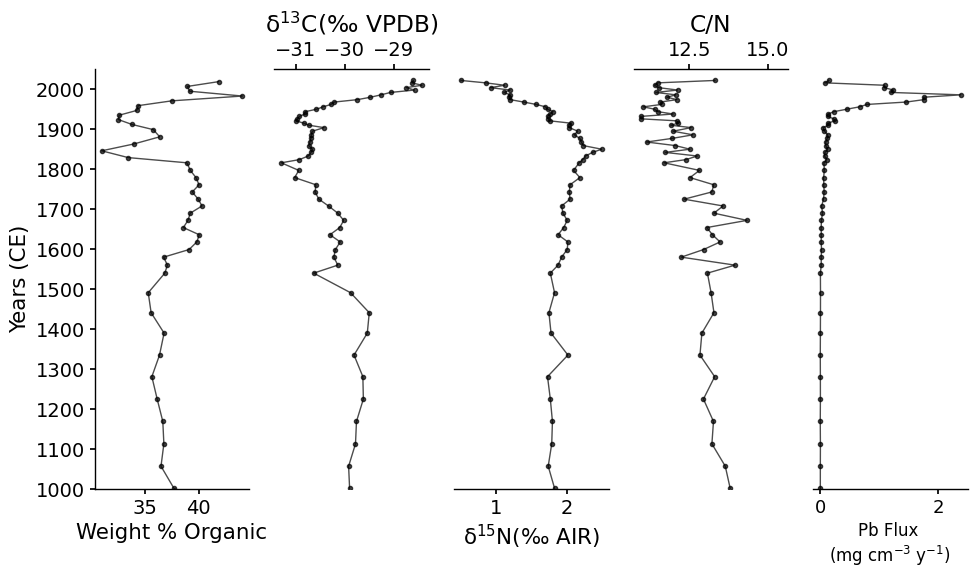

In [ ]:
# 1. Reading the data from the TXT file
data_dir = '/content/drive/MyDrive/Time Series'
# Open the dataset assuming it's a CSV file, change to pd.read_table for TSV files
data = pd.read_csv(data_dir+'/Challisdata.txt', sep='\t')
dates = data['CE'].tolist()
values1 = data['Weightorganic'].tolist()
values2 = data['13C'].tolist()
values3 = data['15N'].tolist()
values4 = data['CN'].tolist()
values4 = data['Pb Flux'].tolist()
print(values1)

non_nan_data1 = data[['CE','Weightorganic']].dropna()
non_nan_data2 = data[['CE','13C']].dropna()
non_nan_data3 = data[['CE','15N']].dropna()
non_nan_data4 = data[['CE','CN']].dropna()
non_nan_data5 = data[['CE','Pb Flux']].dropna()
dates_non_nan1 = non_nan_data1['CE'].tolist()
values_non_nan1 = non_nan_data1['Weightorganic'].tolist()
dates_non_nan2 = non_nan_data2['CE'].tolist()
values_non_nan2 = non_nan_data2['13C'].tolist()
dates_non_nan3 = non_nan_data3['CE'].tolist()
values_non_nan3 = non_nan_data3['15N'].tolist()
dates_non_nan4 = non_nan_data4['CE'].tolist()
values_non_nan4 = non_nan_data4['CN'].tolist()
dates_non_nan5 = non_nan_data5['CE'].tolist()
values_non_nan5 = non_nan_data5 ['Pb Flux'].tolist()

# 2. Create subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 6))

axes[0].plot(values_non_nan1, dates_non_nan1, label='Weight % Organic', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o', markersize=3)
axes[1].plot(values_non_nan2, dates_non_nan2, label='δ13C(% VPDB)', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o',  markersize=3)
axes[2].plot(values_non_nan3, dates_non_nan3, label='δ15N(% AIR)', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o',  markersize=3)
axes[3].plot(values_non_nan4, dates_non_nan4, label='C/N', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o',  markersize=3)
axes[4].plot(values_non_nan5, dates_non_nan5, label='C/N', linestyle='-', linewidth=1, alpha=0.7, color='black', marker='o',  markersize=3)


# 4. Customizing the subplots
axes[0].set_title('')
axes[0].set_xlabel('Weight % Organic')
axes[0].set_ylabel('Years (CE)')
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(False)
ce_ticks = [1000,1100, 1200,1300, 1400,1500, 1600,1700, 1800,1900, 2000]  # Add more values as needed

axes[0].set_yticks(ce_ticks)

axes[1].set_title('δ$^{13}$C(‰ VPDB)')
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(False)
axes[1].set_yticks([])
axes[1].spines['left'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)
axes[1].spines['top'].set_visible(True)
axes[1].xaxis.tick_top()

axes[2].set_title('')
axes[2].set_xlabel('δ$^{15}$N(‰ AIR)')
axes[2].set_yticks([])
axes[2].spines['left'].set_visible(False)
axes[2].tick_params(axis='x', rotation=0)
axes[2].grid(False)

axes[3].set_title('C/N')
axes[3].set_xlabel('')
axes[3].tick_params(axis='x', rotation=0)
axes[3].grid(False)
axes[3].set_yticks([])
axes[3].spines['left'].set_visible(False)
axes[3].spines['bottom'].set_visible(False)
axes[3].spines['top'].set_visible(True)
axes[3].xaxis.tick_top()

axes[4].set_title('')
axes[4].set_xlabel('Pb Flux \n(mg cm$^{-3}$ y$^{-1}$) ', fontsize=12)
axes[4].set_yticks([])
axes[4].spines['left'].set_visible(False)
axes[4].tick_params(axis='x', rotation=0)
axes[4].grid(False)
axes[4].tick_params(axis='both', labelsize=13)

axes[0].set_ylim([1000, 2050])
axes[1].set_ylim([1000, 2050])
axes[2].set_ylim([1000, 2050])
axes[3].set_ylim([1000, 2050])
axes[4].set_ylim([1000, 2050])



# Adjust layout and show the plots
plt.tight_layout()
plt.savefig("Challismetal.png")
files.download("Challismetal.png")
plt.show()